# Qiskit QEC Software Framework

**Note** There is another tutorial tomorrow that is a great follow on to this tutorial.


**TUT19 — Running Quantum Error Correction with IBM Quantum Services**

- Micheal Healy, IBM Quantum, USA
- Thomas Alexander, IBM Quantum, Canada
- Edward Chen: IBM Quantum, USA

In that tutorial, they will introduce attendees to the basics of quantum error correction alongside OpenQASM3, a programming language that provides the features necessary to achieve quantum advantage using near-term quantum computers. They will then provide a high-level overview of the hardware and software requirements needed to implement dynamic control flow and quantum error correction. Finally, attendees will be taught how to write and run programs containing dynamic control flow and implement quantum error correction using real quantum systems provided through IBM Quantum Services and Qiskit.

***
https://github.com/qiskit-community/qiskit-qec/blob/main/docs/tutorials/QEC_Framework_IEEE_2022.ipynb

***

Qiskit Framework for Quantum Error Correction is an open-source framework for developers, experimentalist and theorists of Quantum Error Correction (QEC).

QEC is a rapidly envolving and growing field with more and more papers appearing each month with experimental and theoretical imporantance. Many of these papers develop custom software for each new paper and that is not shared publically. Most of this software is also "shame" software that is not extensible or generalizable, has no documentation and often takes significiant amounts of time to develop. 

This represents a significiant amount of wasted time for the community!

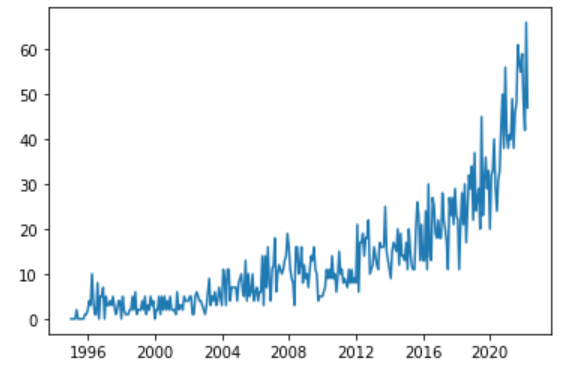

## Framework Design

The design and development of the Qiksit QEC software framework aims to satisfy several design conditions/features:

1. Open Source - Apache equivalent licenses
2. Not isolated - designed to allow users to use other software tools and frameworks
3. Flexible, modular and simple architecture that prioritizes:
    * Ease of use and speed of development
    * Scaling of computations
    * Speed of computations
 
### Layer Design

```

         ┌   Layer 3: Maximum flexibility, convenience, options, many checks, ...      
Python   ┤     
         └   Layer 2: Specialized methods, strict inputs, no checks 
         ┌ 
C/C++... ┤   Layer 1: High performance methods
         └ 
``` 

## Framework Components (Now and Future)

The Framework is (will be) composed of three different componets:

1. CLI (Command Line/Programming Interface)
2. Creator
3. Interactor


### The Creator

The creator is a graphical user interface specifically designed for the construction and viewing of codes by graphical methods. It is designed to create and edit code structures and so uses a internal representation that is design for these operations. It will have the ability to load and save codes in multiple formats and representations.

We are currently exploring how to best build this component to produce a visually appeallying, stable and modern interface using Apache like licenses.

### The Interactor

The interactor is a graphical user interface specifically designed for the interaction and viewing of QEC computations/simulations graphically. As such is will use an internal representation that is designed for reading and displaying. It is being designed to help both experimental and theory researchers and will allow both real machine computations as well as simulations.


As with the creator we are currently exploring how to best build this component to produce a visually appeallying, stable and modern interface using Apache like licenses.

### Commmand Line/Programming Interface

The CLI/PI is the non-GUI part of the framework that is used by users to write programs or scripts and is used by the other two components to do QEC computations.


The current github repo is located at:  https://github.com/qiskit-community/qiskit-qec     

### Structure


```
├── qiskit_qec
        ├── analysis
        ├── circuits
        ├── codes
        ├── decoders
        ├── extensions
        ├── geometry
        ├── info
        ├── linear
        ├── noise
        ├── operators
        ├── structures
        └── utils
        
```

The analysis, circuits, decoders and noise sections will be included in James Wooton and Andrew Cross's programming topics. The other sections will be quickly discussed here.

[8 minutes]

# Installation guide

## Content
* [Setting up python environment](#setting-up-python-environment)
* [Installing Qiskit QEC](#installing)
* [Installing optional dependencies](#installing-optional-dependencies)

### Setting up python environment

Next, we assume that [Python](https://www.python.org/) 3.6 or higher is installed.  It is recommended to use a Python virtual environment that is dedicated to working with `qrao`.  The steps in the remainder of this tutorial will assume that this environment is activated using either method.


#### Option 1: conda (recommended)

Install [conda](https://docs.conda.io/en/latest/).

The following commands create and activate a conda virtual environment named `qiskit_qec_env`:

```sh
$ conda create -n qiskit_qec_env python=3
$ conda activate qiskit_qec_env
```

Any time you open a new shell and wish to work with Qiskit QEC, you will need to activate it using the second line above.


#### Option 2: venv (included in Python)

You can create and activate a virtual environment with the following commands:

```sh
$ python3 -m venv venv
$ source venv/bin/activate
```

The first command creates a virtual environment in the `venv` folder of the current directory.  We recommend using this name, as it will be ignored by git (i.e., we have added it to `.gitignore`).

Any time you open a new shell and wish to work with Qiskit QEC, you will need to activate it using the second line above.  [If you prefer that the virtual environment be activated automatically any time you enter the directory, you may wish to look into using [direnv](https://direnv.net/) or a similar tool.]

### Installing

1. Clone repo

```shell
git clone https://github.com/qiskit-community/qiskit-qec
cd qiskit-qec
```

2. Install dependences (all):

```shell
pip install -r requirements.txt
pip install -r requirements-dev.txt
pip install pylatexenc
```

3. Install from source using the following command.

```shell
pip install -e .
```

4. Install Qiskit

```shell
pip install qiskit
```

Note that some alternative commands to install from source, or to install directly from github, may not work properly. So if you have problems, make sure to use the exact command shown above.

### Installing optional dependencies

Installing dev dependencies (tox, pylint, etc).

```shell
pip install -r requirements-dev.txt
```

You will probably need jupyter notebook to work on project.

```shell
conda install jupyter
```

In [ ]:
pip install --no-cache --upgrade git+https://github.com/qiskit-community/qiskit-qec.git

If you are having troubles installing qiskit-qec locally, you can use it in the IBM Quantum Lab

https://lab.quantum-computing.ibm.com/

Open a notebook and paste the following into a code cell

```
pip install --no-cache --upgrade git+https://github.com/qiskit-community/qiskit-qec.git
```

Then you should be good to go!




# Quantum Error Correction

**Error correction** is a central topic in information theory and is concerned with the **detection** and **correction** of errors in information.

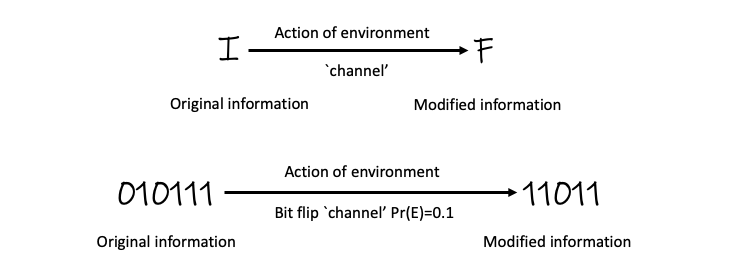

Here the bit flip channel is an error channel that flips individual bits independently with a given fixed probability. In this example we see that the funcdmental unit of storage is the bit - the two state space $\mathbb{F}_2$. Here a message is therefore a string of bits and so an element of $\mathbb{F}^n_2$ for some integer $n$.

```
One of the key ideas in error correction is   d n    y.    u dan y  R dun  n  .
```

Steve Flammia, Quantum Error Correction Summer School, 2022

## Repitition Code (Classicial)

The simplist approach to (classical) error correction is that of repitition: That is a 0 bit is replaced by a fixed number of 0 bits (say 3) 000 and a 1 bit is replaced by the same number of 1 bits 111. The then binary information before can be encoded as follows:

```
010011 -> 000 111 000 000 111 111
```

How does this help and what is the correction algorithm? Let's consider the effects of a bit flip noise channel on a repetition code 

```
0 -> 0000000
1 -> 1111111

            ┌ 0000000      0 errors    (1-p)^7
            │ 1000000, ... 1 error    p(1-p)^6
            │ 1100000, ... 2 errors p^2(1-p)^5
0000000 ->  ┤ 1110000, ... 3 errors p^3(1-p)^5
            │ 1111000, ... 4 errors p^4(1-p)^5
            │ 1111100, ... 5 errors p^5(1-p)^5
            │ 1111110, ... 6 errors p^6(1-p)^5
            └ 1111111, ... 7 errors p^7
```

If the number of errors is less than half the repetition length (7/3) then we can detect that an error has occured and we can also correct that error via the process of majority voting.

Example:

```
0000000000 -> (bit flip channel) -> 0000100110 -> majority voting decoder -> 0000000000
```

<div class="alert alert-block alert-info">
<b>Note:</b> In order to use the repitition code we needed to be able to do one of the following two things:
    <ol>
        <li> Read a bit, with out destroying any information, and then cloning that bit repeatedly </li>
        <li> Clone a given unknow bit </li>
    </ol>
</div>

## Quantum Error Correction

In classical error correction the simplest fundamental unit is the bit ($\mathbb{F}_2$) where as in the quantum world the simplest fundamental unit is the qubit ($\mathbb{C}^2$). Consider the differences:

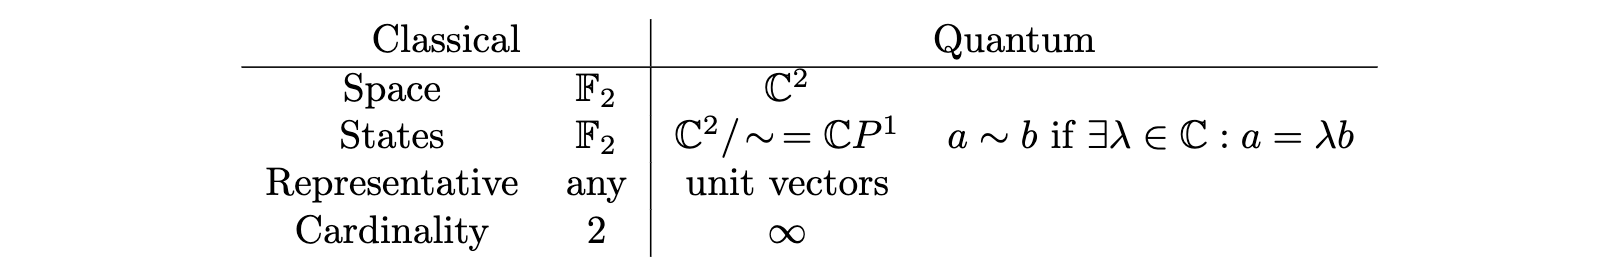

We consider $\mathbb{C}^2$ as a complex Hilbert space (think complex vector space with an inner product $\langle,\rangle>$ such that the induced norm makes the space a complete metric space).



<div class="alert alert-block alert-info">
<b>Note:</b> We will follow the physics conventions for inner products, will use the bra-ket notation and will mostly use the dagger notation for adjunct and conjugate transpose. So that means that an inner product is linear in the second variable and conjugate linear in the first varaiable. 

$\langle a,\lambda b\rangle = \lambda\langle a, b\rangle$ and
$\langle \lambda a, b\rangle = \lambda^{\dagger}\langle a, b\rangle$
    
In the bra-ket notation an element of the Hilbert space is represented by $|\phi\rangle$ and the ket linear functional $\langle\phi|$ acts as
$\langle\phi|(|\psi\rangle) = \langle\phi,\psi\rangle = \langle\phi|\psi\rangle$
    
When the states of the Hilbert space are represented as rays then these states are known as **pure** states. The Quantum Mechanics axioms can be generalized to denisty operators such that **mixed** states are allowed but these will not be used in this tutorial. However the density operator approach is useful so some limited aspects will be used. For a pure state $|\phi\rangle$ the corresponding density operator is

$$\rho_{\phi} = |\phi\rangle\langle\phi| = |\phi\rangle|\phi\rangle^\dagger$$

We note that if $U$ is a unitary operator on the Hilbert space then the action of $U$ on an state vector $|\phi\rangle$ induces a $\dagger$-conjugation on the density operator $\rho_{|\phi\rangle}$:

$$|\phi\rangle \mapsto U|\phi\rangle$$

\begin{align}
\rho_{U|\phi\rangle} &= U|\phi\rangle (U|\phi\rangle)^\dagger \\
&=U|\phi\rangle\langle\phi|U^\dagger \\
&=U\rho_{|\phi\rangle}U^\dagger
\end{align}
    
Multiple qubits are modeled via tensor products and so $n$-qubit system has a Hilbert space

$$
\mathcal{H} = \mathbb{C}^2\otimes\cdots\otimes\mathbb{C}^2 = (\mathbb{C}^2)^{\otimes{n}}
$$
</div>

### Challenges

While quantum computing offers significant speed increases for a range of problems this comes at the cost of some extra restrictions or challenges. For quantum error correction we see that the following challenges occur:

- **No cloning** : It is not possible to clone an unknown state
- **Continuous Errors** : Errors are not longer discrete but continuous
- **Measurement destroys information** : Observations in quantum general destroy superpositions

It turns out that now of these challenges are fatal yet they do require different approachs to error correction from the classicial situation.

### Quantum Error Correcting Codes

**Definition** Let $\mathcal{H}$ be a complex Hilbert Space. A quantum error correcting code is a decomposition of $\mathcal{H}$ of the form

$$\mathcal{H} = (A\otimes{B})\oplus{C}$$

Qauntum information is encoded into $A$. If $B$ is trivial (that is $A\otimes{B}\simeq{A}$) then the code is just a subspace of $\mathcal{H}$. If $B$ is not trivial then the code is called a **subsystem** code.

For this tutorial we will be assume that $\mathcal{H}=(\mathbb{C}^2)^{\otimes{n}}$ and that the $A$, $B$ and $C$ all have dimensions that are powers of $2$.

#### Error Correcting Conditions

Let $\mathcal{E}$ be a completely positive trace preserving (CPTP) linear map $\mathcal{E}:D(\mathcal{H})\rightarrow D(\mathcal{H})$ (that is an arbitary quantum channel). With respect to the given subsystem code $\mathcal{H} = (A\otimes{B})\oplus{C}$ we say that $\mathcal{E}$ is recoverable if there esists another CPTP linear map $\mathcal{R}$ such that for any $\rho_A\in D(A)$ and 
$\rho_B\in D(B)$ there exists a $\rho'_B\in D(B)$ such that

$$\mathcal{R}\circ\mathcal{E}(\rho_A\otimes\rho_B)  = \rho_A\otimes\rho'_B$$

### Stabilizer Subsystem Codes

A codes of the form $\mathcal{H} = (A\otimes{B})\oplus{C}$ are difficult to study without any other properties. A significant class of subsystem codes, and codes of significant interest to QEC researchers, are know as **stabilizer subsystem codes**. To understand stabilizer subsystem codes we must first introducde the Pauli operators and associated groups.

## Pauli Operators and Groups

Pauli operators the associated groups play an important role in Quantum computing and in quantum error correction. 

<div class="alert alert-block alert-info">
<b>Note:</b> The following matrices are know as the Pauli Matrices

$$
\sigma_0=\sigma_I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\quad
\sigma_1=\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\quad
\sigma_2=\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\quad
\sigma_3=\sigma_y = \begin{bmatrix} 0 & i \\ -i & 0 \end{bmatrix}
$$

they have some very nice and a useful properties:

1. $\sigma_y = i\sigma_x\sigma_z$
2. They are unitary ($U^{-1}=U^\dagger$), Hermitian ($U^\dagger=U$) and Involutory ($U=U^{-1}$)
3. $\textrm{span}_{\mathbb{C}}(\sigma_I,\sigma_x,\sigma_z,\sigma_y)=\mathcal{M}_{2x2}(\mathbb{c})$
4. $\sigma_a^2=\sigma_i$ for $a$ in $\{I,x,z,y\}$
5. $\sigma_x\sigma_z=-\sigma_z\sigma_x$
    
</div>

### Pauli Operators and Groups

The Pauli matrices can be considered as matrix representations of operators on the hilbert space $\mathbb{C}^2$ with respect to the standard basis. When viewed as operators we instead often use the names $I,X,Z$ and $Y$ for $\sigma_i,\sigma_x,\sigma_z$ and $\sigma_y$ respectively. For this tutorial we will use the operator names. 

**Definition:** The **Pauli group** or the pauli group on a single qubit $\mathcal{P}_1$ is defined by

$$\mathcal{P}_1 = \langle iI, X, Z \rangle$$

This is sometimes called the complex Pauli group and the following is often called the real Pauli group or the effective Pauli group:

$$\mathcal{P}^*_1 = \langle X, Z \rangle$$

We can now deifne the Pauli group on $n$-qubits. Since the Hilbert space of $n$-qubits is $(\mathbb{C}^2)^{\otimes n}$ we see that a natural definition of the $n$-qubit Pauli group is defined (via the universal property of tensor products) as:

**Definition:** The $n$-qubit **Pauli group** $\mathcal{P}_n$ is defined by
\begin{align}
\mathcal{P}_n &= \mathcal{P}_1\otimes\cdots^n\otimes\mathcal{P}_1 = \mathcal{P}_1^{\otimes n} \\
&= \langle iI, X_1, X_2, ..., X_n, Z_1, Z_2, ..., Z_n \rangle
\end{align}

likewise the effectice or real Pauli group on $n$-qubits is defined as:

$$
\begin{align}
\mathcal{P}^*_n &= \mathcal{P}^*_1\otimes\cdots^n\otimes\mathcal{P}^*_1 = {\mathcal{P}^*_1}^{\otimes n} \\
&= \langle X_1, X_2, ..., X_n, Z_1, Z_2, ..., Z_n \rangle
\end{align}
$$

In the above defintions we are using a common notation for operators with a single qubit support. That is if $T$ is an bounded linear operator on the single qubit Hilbert space $\mathbb{C}^2$ then $T_i$ is the bounded linear operator on the $n$-qubit Hilbert space defined by $T$ acting on the $i$-th qubit and the identity operator acting on the remaining qubits.

If $e_0=[1,0]^T$ and $e_1=[0,1]^T$ then $|e_0\rangle$ and $|e_1\rangle$ form an orthonormal basis for $\mathbb{C}^2$. It is usual to write $|0\rangle := |e_0\rangle$ and $|1\rangle := |e_1\rangle$. Then the actions of the Pauli matrices/operators on this basis are

$$X|0\rangle = |1\rangle, \quad X|1\rangle = |0\rangle \quad \textrm{(Bit Flip)} \qquad\qquad  Z|0\rangle = |0\rangle, \quad Z|1\rangle = -|1\rangle \quad  \textrm{(Phase Flip)}$$

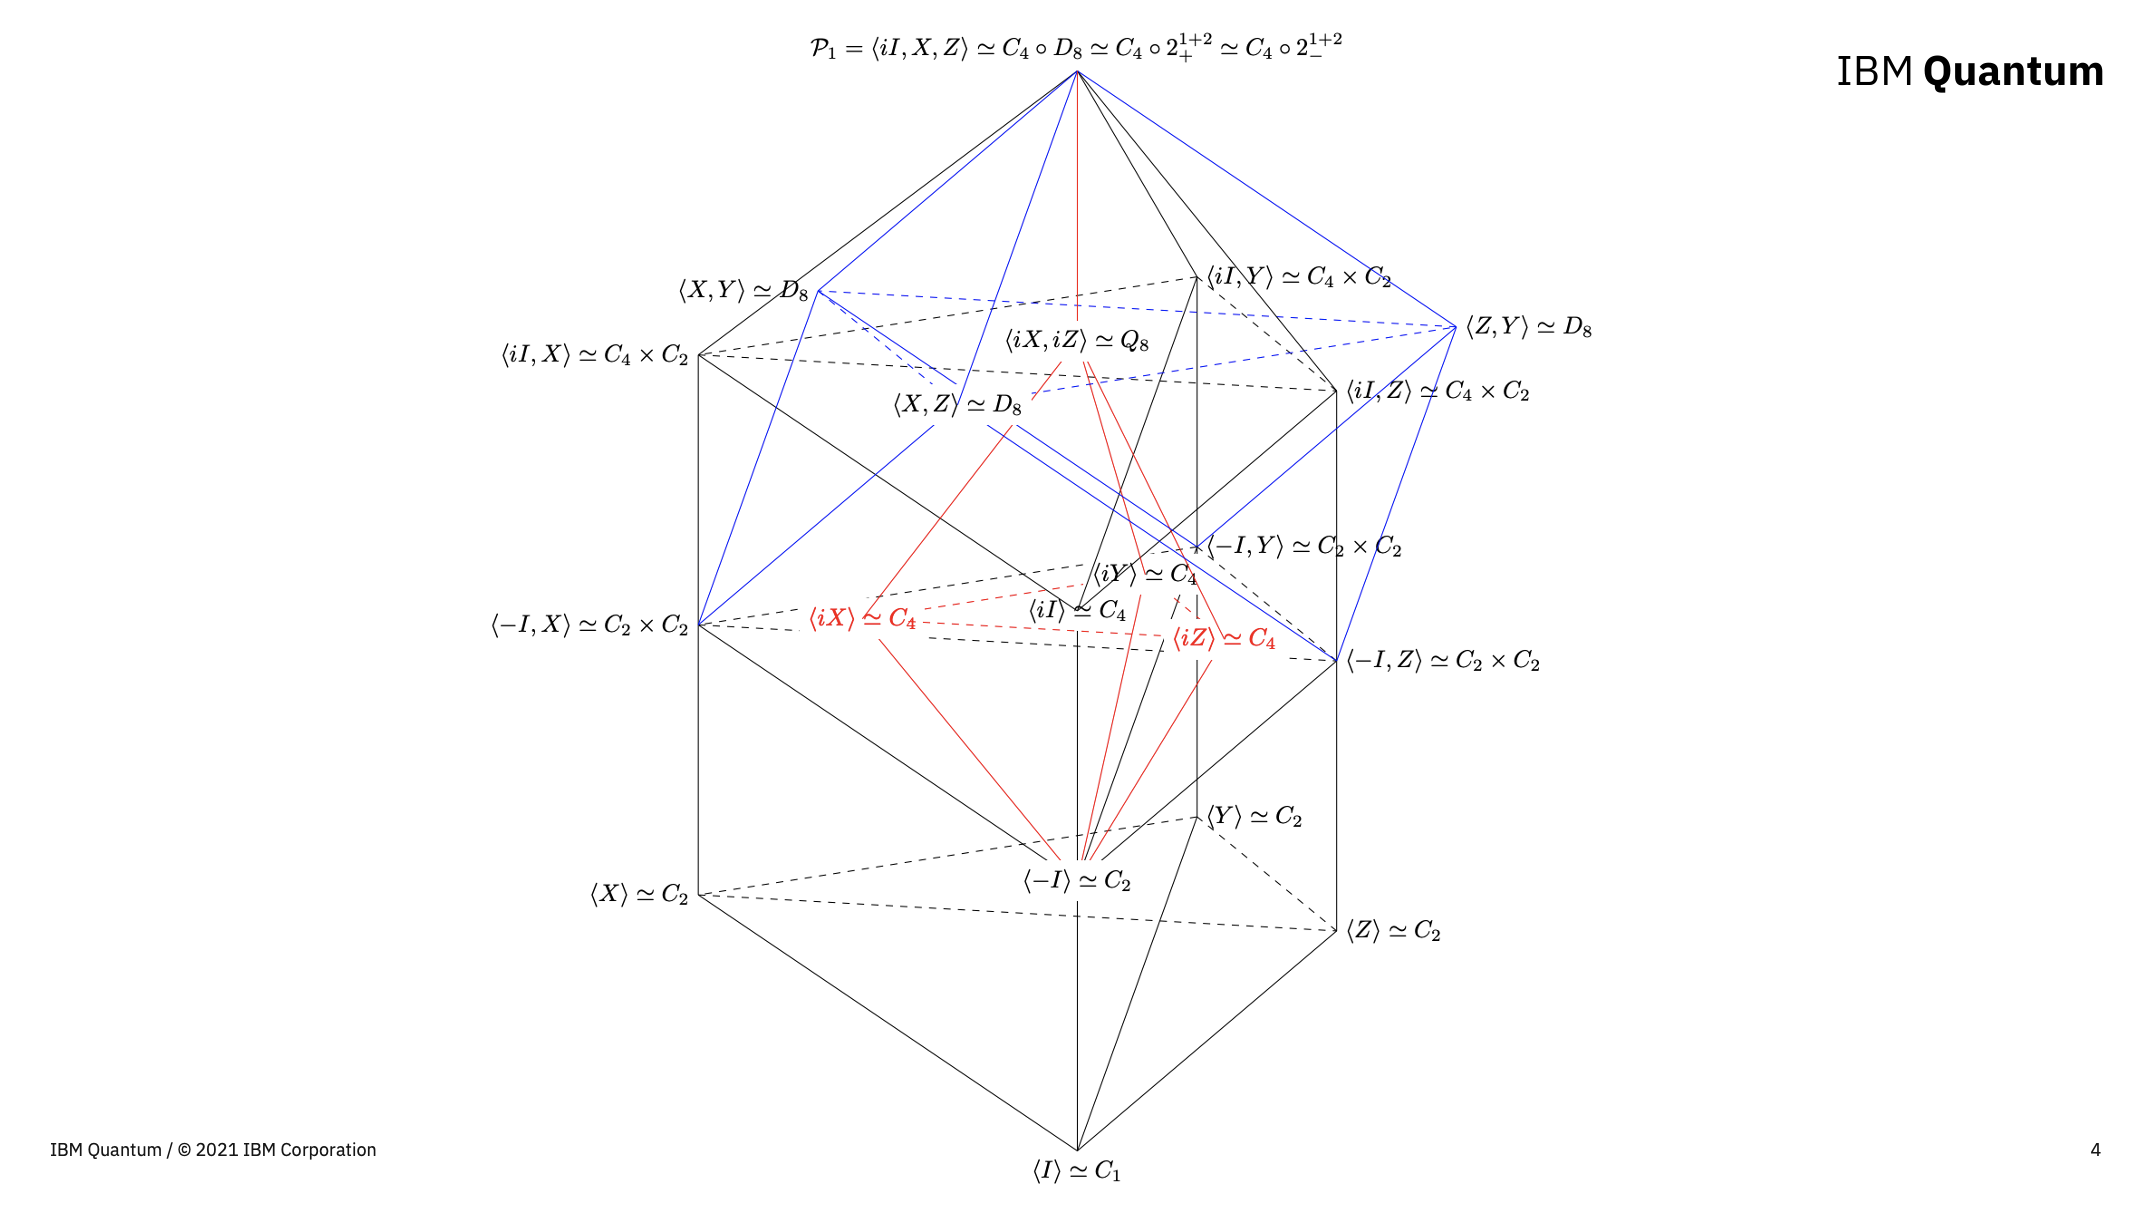

### Representation of Pauli Operators

A Pauli operator $Q\in\mathcal{P}_n$ can be represented by a complex matrix of dimensions $2^n \times 2^n$ but this requires $2^{2n}$ complex numbers. Alternatively, the Pauli operator $Q$ can be written as

$$ Q = \rho_Q X^{\delta}Z^{\tau}\quad\delta,\tau\in\mathbb{F}_2^n$$

where 

$$ X^{\delta} = X^{\delta_1}\otimes X^{\delta_2}\otimes\cdots\otimes X^{\delta_n}$$

We can then define the map $\phi:\mathcal{P}_n\rightarrow\mathbb{F}_2^{2n}$ defined by

$$
\phi(Q)=\phi(\rho_Q X^{\delta}Z^{\tau}) := [\delta|\tau]
$$

**Example** Let $Q=Y\otimes{X}\otimes{I}\otimes{Z} = YXIZ = Y_0X_1Z_3 = -iZX\otimes{X}\otimes{I}\otimes{Z} = iXZ\otimes{X}\otimes{I}\otimes{Z} ...$ then

$$\phi(Q) = [1 1 0 0 1 0 0 1]$$

So now a list of Pauli operators from $\mathcal{P}_n$ can be expressed as a matrix:

**Example** Let $S = [ Y_0X_1Z_3,\, X_0Y_3,\, Z_2 ]$ then the set $S$ can be represented as

$$
S = 
\begin{bmatrix}
    1 & 1 & 0 & 0 & 1 & 0 & 0 & 1 \\
    1 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0
\end{bmatrix}
$$

The above matrix representation is called a **symplectic representation** (more to follow).

In [1]:
from qiskit_qec.operators.pauli import Pauli

f = Pauli("XYXYXXXIIIX")
f.matrix

array([[ True, False, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False,
         True, False,  True, False]])

In [2]:
f.matrix.astype(int)

array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

<div class="alert alert-block alert-info">
<b>Note:</b> That there are mutilple ways to interpret the Pauli string "XYXYXXXIIIX" including whether the to read the qubits from left-to-right or right-to-left. The default for qiskit currently is right-to-left.
</div>

The `BasePauli` class is the class primarily responsible for representing Pauli operators using dense numpy arrays.

```
BasePauli
    ├── Pauli
    └── PauliList
```

<div class="alert alert-block alert-info">
<b>Note:</b> At the moment the `BasePauli` and associated classes in Qikit-QEC are different from the `BasePauli` in the quantum_info module from Qiskit Terra. The BasePauli classes in Qiskit-QEC have been rewritten to add features and speed useful for QEC research. Once the Qiskit-QEC becomes more stable the two different implementations will be merged.
</div>

The BasePauli class internally stores a list of Pauli operators a symplectic matrix plus a phase vector. If phases are not of interest then the symplectic representation is the same for a wide range of representations (see below) of Pauli operators. The only point that needs to be mentioned is that you need to know which is the $X$ and $Z$ parts. If phases are included, then one needs to decide how the symplectic representation and phase combine to create the phases.

The symplectic representation within the BasePauli, Pauli and PauliList classes is stored as a boolean numpy array. This representation is good when these matrices are dense but quickly becomes inefficient once when the matrices are sparse - especially as the number of qubits grows. In the future a BaseSparsePauli, SparsePauli and SparsePauliList will be included using a sparse matrix representation.

Given the minimal generating set for the $n$-qubit Paulis $\langle iI,X_1,X_2,\dots,X_n,Z_1,Z_2,\dots,Z_n \rangle$ any Pauli operator $P\in\mathcal{P}_n$ can be represented by a pair $(\phi{},S)$ where $\phi\in\{1,-1,i,-i\}$ is the phase and $S$ is the symplectic representation of the Pauli operator relative to the standard generating set. 

There are several ways to represent a Pauli operator and some of these are given here. Without loss of generality we use the standard normalized generating set for $\mathcal{P}_n$. In the following representations $\delta_j,\rho_j \in F_2$ for all $j$.

Format | Representation
-----|------
`XZ ` | $$P = \phi * X^{\delta_1} Z^{\rho_1} \otimes ... \otimes X^{\delta_n} Z^{\rho_n}$$
`ZX ` | $$P = \phi * Z^{\rho_1} X^{\delta_1}  \otimes ... \otimes Z^{\rho_n} X^{\delta_n}$$ 
`XZY`| $$P = \phi * i^{\delta_1\rho_1} X^{\delta_1} Z^{\rho_1}  \otimes ... \otimes i^{\delta_n\rho_n} X^{\delta_n} Z^{\rho_n}$$ 
`YZX`| $$P = \phi * (-i)^{\delta_1\rho_1} Z^{\rho_1} X^{\delta_1}  \otimes ... \otimes (-i)^{\delta_n\rho_n} Z^{\rho_n} X^{\delta_n}$$ 

**Example**: consider the Pauli operator $P=-iXZY = -i X\otimes Z \otimes Y$. Below is how $P$ could be represented in the different formats above:

Format | Mathematical Representation | String Representation 
-------|---------|---------
`XZ` | $\phantom{-i} X\otimes Z \otimes XZ$ | $\phantom{-i}(XI)(IZ)(XZ)$
`ZX` | $-\phantom{i} X\otimes Z\otimes ZX$ | $-\phantom{i}(IX)(ZI)(ZX)$
`XZY` | $-i X\otimes Z\otimes Y$ | $-iXZY$
`YZX` | $-i X\otimes Z\otimes Y$ | $-iXZY$

It is also sometimes useful to represent the phase $\phi$ is differently. The following are some examples: 

Format | Mathematical Representation | String Representation
----|----|----
` i ` | $i^r$ where $r \in F_4$ | $(i,r)$
`-i ` | $(-i)^r$ where $r \in F_4$ | $(-i,r)$
` is` | $i^r (-1)^s$ where $r,s \in F_2$ | $(i,r)(-1,s)$
`-is` | $(-i)^r (-1)^s$ where $r,s, \in F_2$ | $(-i,r)(-1,s)$

The order of the qubits is also important when representing the different formats in an extended symplectic form. Internally Qiskit reads Pauli operator strings from left to right. That is if $P=-iXZY$ and qubits are labeled $0,1,2$ then the $Y$ component is acting on qubit $0$, the $Z$ component is acting on qubit $1$ et cetera. You could also have the more natural ordering of right to left. Below gives the example below for these two options in symplectic representation - the $X$ and $Z$ components are show in $[X|Z]$ order:

Format | String Representation | Left-Right (not Qiskit Internal) | Right-Left (Qiskit Internal)      
-------|---------|---------|--------
`XZ` |  $\phantom{-i}(XI)(IZ)(XZ)$ | $\phantom{-i} [1 0 1\vert 1 1 0]$ | $\phantom{-i} [1 0 1\vert 0 1 1]$
`ZX` | $-\phantom{i}(IX)(ZI)(ZX)$ |  $-\phantom{i} [1 0 1\vert 1 1 0]$ | $-\phantom{i} [1 0 1\vert  0 1 1]$ 
`XZY` | $-iXZY$ | $-i [1 0 1\vert 1 1 0]$  | $-i [1 0 1\vert  0 1 1]$
`YZX` |  $-iXZY$ | $-i [1 0 1\vert 1 1 0]$  | $-i [1 0 1\vert  0 1 1]$


Internally, the `BasePauli` classes represent Pauli Operators using the `-iZX` representation and product Pauli strings are by default read in right-to-left (This is the same for the quantum_info versions). The Qiskit-QEC versions take advantage of an new module called `pauli_rep` that allows users to input and output different representations and convert between representations.

When outputing string representations the Qiskit-QEC allows the user to set a default setting for output representation formats and ordering.

For example:

In [3]:
# This will set the default output format to index format and read product syntax
# Pauli strings from left-to-right
import qiskit_qec.utils.pauli_rep as pauli_rep
from qiskit_qec.operators.base_pauli import BasePauli

# Set th output string syntax: choose between PRODUCT_SYNTAX, INDEX_SYNTAX and LATEX_SYNTAX
BasePauli.set_syntax(pauli_rep.INDEX_SYNTAX)

# Set the default output qubit ordering: choose between left-to-right and right-to-left
BasePauli.set_qubit_order("left-to-right")

In [4]:
from qiskit_qec.operators.pauli import Pauli
from qiskit_qec.operators.pauli_list import PauliList

f = Pauli("XYXYXXXIIIX", input_qubit_order="left-to-right")
f

Pauli('X0Y1X2Y3X4X5X6X10')

This parameter does not effect the internal right-to-left ordering, only how strings representations are output or input.

#### String Syntax

The are several possible syntaxes for Pauli's as strings. The standard syntax in Qiskit is the "product" syntax

$$'iXYXZ' = i X\otimes Y \otimes X \otimes Z$$

which works well for small numbers of qubits both in entering and reading. As the number of qubits gets larger, but usually the support of the Pauli remains small, this syntax becomes difficult and error prone in input and reading. For example consider:

$$'iIIIIIXIIIIIIIIIIIIIIIIIIIIIIIZ'= iX_6Z_{30} = i I^{\otimes 5}\otimes X\otimes I^{\otimes 23}\otimes Z$$

The more compact syntax of $M_i$ for the tensor with identity acting on all but the $i$-th qubit and $M$ acting on the $i$-th qubit is far better. Input of small weight/support Pauli's is much easier. This syntax is called _indexed_ syntax. This syntax has now been added to the PauliRep class that the BasePauli, Pauli and PauliList classes inherit. It allows one to do the following:

```
Pauli("X1X4Y6")
```

This will produce a Pauli with `Pauli('YIXIIXI')`. The number of qubits is taken to be largest index+1. If you want say 10 qubits with only an X on the qubit 1 then you can do the following
```
Pauli("X1I9")
```
which will give you `Pauli('IIIIIIIIXI')`. This will also work when build PauliLists

```
PauliList(["X1X2X3X4", "Y9Y6X3X1"])
```
which will give you `PauliList(['IIIIIXXXXI', 'YIIYIIXIXI'])`. That is the number of qubits is increased to hold all of the provide Pauli operators.

The `indexed` syntax is strings of the form $P_1n_1P_2n_2...P_kn_k$ where $P_i$ is one of $X,Z,Y$ or $I$ and $n_1,n_2,...,n_k$ are integers.

#### Symplectic Representations

**Definition** A symplectic vector space $V$ over a field $F$ is equioed with a (sympletic) bilinear form $w:V\times V \rightarrow F$ that is

- alternating: $\forall v\in V \quad w(v,v)=0$
- non-degenerate: if $\forall v\in V \quad w(u,v)=0$ then $u=0$

Note that skew-symmetric follows: $w(u,v)=-w(v,u)$. Using this form we see that 

$$
w([a|b] , [a'|b']) = a.b' + b.a'
$$

is a symmetric form making $(\mathbb{F}_2^{2n}, w)$ a symplectic vector space.
$$ 
P = i^p X^{a}Z^{b} \quad Q = i^q X^{\bar{a'}}Z^{\bar{b'}} \quad PQ = (-1)^{w([a|b] , [a'|b'])}QP
$$

### Isotropic-Hyperbolic Generating Sets

Consider the standard generating set for $\mathcal{P}_n$: $iI, X_1, X_2, ..., X_n, Z_1, Z_2, ..., Z_n$. This particular generating set has some nice properties in that each the element of the set anticommutes with only a single other element from the set. More specifically

\begin{align}
[X_i,X_j] = [Z_i,Z_j] &=I \quad\textrm{for all $i$ and $j$} \\
[X_i,Z_j] &= I \quad\textrm{for $i\not= j$} \\
[X_i,Z_i] &= -I \quad\textrm{for all $i$}
\end{align}

So we see that the generating elements come in what are call hyperbolic pairs relative to the generating set.

There are many such generating sets and one can show that they are all related to the standard basis via $\dagger$-conjugation by some Clifford operator $U$ (to be defined) that depends on the generating set.

<div class="alert alert-block alert-info">
    <b>Note:</b> Let $G$ be a finite group. A generating set $X$ of $G$ is said to be minimal if no proper subset of $X$ generates $G$. We denote by $d(G)$ the minimal number of generators of $G$, i.e., the smallest size of a minimal generating set of $G$, and we write $m(G)$ for the largest size of a minimal generating set of G. Note that since $\mathcal{P}_n$ is a 2-group it follows from Burnside's basis theorem $d(B)=m(B)$ for any subgroup of $\mathcal{P}_n$. [https://doi.org/10.1016/j.jalgebra.2013.11.005]
</div>

<div class="alert alert-block alert-info">
    <b>Note:</b> Since $\mathcal{P}_n$ is a 2-group it follows from Burnside's basis theorem that $d(B)=m(B)$ for any subgroup of $\mathcal{P}_n$.
</div>

**Definition** Let $g_1,g_2,...,g_k,x,z$ be a minimal generating set for some group $\mathcal{G}\leq\mathcal{P}^*_n$ such that $x$ and $z$ commute with $g_1,g_2,...,g_k$ but $x$ and $y$ anticommute. The the pair $x$,$z$ is called a **hyperbolic** pair relative to the given generating set.

**Defintion** Let $\mathcal{G}\leq\mathcal{P}_n$ with $\alpha, Z'_1, Z'_2, ..., Z'_k, X'_{k+1},Z'_{k+1},...,X'_{k+r},Z'_{k+r}$ being a minimal generating for $\mathcal{G}$ such that 

- $Z(\mathcal{G})=\langle \alpha, Z'_1, Z'_2, ..., Z'_k \rangle$
- $X'_j,Z'_j$ is a hyperbolic pairs for $j=k+1, ...,k+r$

The this generating set is called a isotropic-hyperbolic generating set (basis) for $\mathcal{G}$. We call $Z(\mathcal{G})$ the isotropic part and the generators the isotropic generators and we call the group generated by the hyperbolic pairs the hyperbolic part and the generators the hyperbolic generators.

**Proposition** [See Nielsen & Chuang] Let $S=\langle g_1,g_2,...,g_l\rangle$ be a minimal generating set such that $-I\not\in S$. For $i$ in $[l]$ there exists a $v\in\mathcal{P_n}$ such that 

$$
[v,g_i]=-I \quad\textrm{and}\quad [v,g_j]=I \quad\textrm{for all $j\not=i$}
$$

That is, for any element of the minimal generating set I can find a hyperbolic partner in $\mathcal{P}_n$.

In [19]:
# Implementation of Proposition above

import numpy as np
from qiskit_qec.linear.symplectic import build_hyper_partner

matrix = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
    ],
    dtype=np.bool_,
)
av = build_hyper_partner(matrix, 0)
print(f"⟨g_1,g_2,...,g_l⟩={PauliList(matrix)}")
print(f"Hyperbolic pair of {Pauli(matrix[0])} is {Pauli(av)}")

⟨g_1,g_2,...,g_l⟩=['X0', 'X1', 'X2', 'X3']
Hyperbolic pair of X0 is Z0


In [20]:
import numpy as np
from qiskit_qec.linear.symplectic import _build_hyper_partner

matrix = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
    ],
    dtype=np.bool_,
)
av = _build_hyper_partner(matrix, 0)
print(f"⟨g_1,g_2,...,g_l⟩={PauliList(matrix)}")
print(f"Hyperbolic pair of {Pauli(matrix[0])} is {Pauli(av)}")

⟨g_1,g_2,...,g_l⟩=['X0', 'X1', 'X2', 'X3']
Hyperbolic pair of X0 is Z0


### Symplectic Gram-Schmidt Process

The input to this procedure is a set of $m$ Pauli operators $\mathcal{J}=\{g_1, g_2, \dots, g_m\}$ that generate a gauge group $\mathcal{G}\leq\mathcal{P}_n$. The output is a isotropic-hyperbolic generating set (basis) for $\mathcal{G}$.

We maintain three sets of operators: 

1. unprocessed generators $\mathcal{U}$, 
2. processed isotropic generators $\mathcal{I}$ and
3. processed hyperbolic pairs $\mathcal{H}$. 

For the initial setup we assume that the $m$ generators are independent and we set $\mathcal{U}\leftarrow\mathcal{J}$. Then repeat until $\mathcal{U}$ is empty

- Take $g\in\mathcal{U}$ and set $\mathcal{U}\leftarrow\mathcal{U}\backslash\{g\}$
- if $g$ commutes with every element of $\mathcal{U}$ set $\mathcal{I}\leftarrow\mathcal{I}\cup\{g\}$. Choose next $g$.
- find a $g'\in\mathcal{U}$ such that $[g,g']=-I$ and set $\mathcal{U}\leftarrow\mathcal{U}\backslash\{g'\}$
- for each $v\in\mathcal{U}$ make $v$ commute with the processes hyperbolic pairs:
\begin{align}
v&\leftarrow vg \quad\textrm{if}\quad [v,q]=-I \\
v&\leftarrow vg' \quad\textrm{if}\quad [v,q']=-I \\
\end{align}

The result will yield 

- a set of $m-2r$ isotropic generators say $\{Z'_1,Z'_2,...,Z'_{m-2r}\}$ and 
- a set of $r$ hyperbolic pairs $\{X'_{m-2r+1},Z'_{m-2r+1},...,X'_{m-r},Z'_{m-r}\}$

such that they represent a isotropic-hyperbolic generating set (basis) for $\mathcal{G}$.

In [21]:
from qiskit_qec.linear.symplectic import locate_hyper_partner

matrix = np.array([[1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0]], dtype=np.bool_)
vector = np.array([0, 0, 0, 0, 0, 1, 0, 0], dtype=np.bool_)
av, index = locate_hyper_partner(matrix, vector)
index, av.astype(int)

(1, array([0, 1, 1, 0, 0, 0, 0, 0]))

In [22]:
# Make elements in a commute with the hyperbolic pairs described in x and y
# x = (x_1,...,x_k) y = (y_1,...,y_k) then the hyperbolic pairs are (x_i,y_i)

from qiskit_qec.linear.symplectic import make_commute_hyper

a = np.array([[1, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0]], dtype=np.bool_)
x = np.array([[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0]], dtype=np.bool_)
z = np.array([[0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0]], dtype=np.bool_)
arange = [0, 1]
a = make_commute_hyper(a, x, z, arange)
a.astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])

In [23]:
# Symplectic Gram-Schmidt
from qiskit_qec.linear.symplectic import symplectic_gram_schmidt

a = np.array(
    [
        [0, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 1],
        [1, 1, 1, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0],
    ],
    dtype=np.bool_,
)
center_, x, z = symplectic_gram_schmidt(a)
print(
    f" a = {PauliList(a)}\n center = {PauliList(center_)}\n x = {PauliList(x)}\n z = {PauliList(z)}"
)

 a = ['Z0X1Z2', 'Z0Z1Z3', 'X0Y1X2', 'X0X1X3']
 center = ['Y0X1X2Z3', 'X0Z1Z2Y3']
 x = ['Z0X1Z2']
 z = ['Z0Z1Z3']


## Stabilizer SubSystem Codes

### Stabilizer Groups

**Definition** Let $S$ be an abelian subgroup of the $\mathcal{P}_n$. Then $\mathcal{S}$ is called a **stabilizer** subgroup. 

### Stabilizer Codes

We wish to define a code associated with the stabilizer $S$. There are different ways to do this and they all result in the same set of codes. For this tutorial we shall use a commonly used approach. 

**Definition**. Let $S$ be a stabilzer subgroup of $\mathcal{P}_n$. The principal code space associated with $S$ is defined by:

$$
C_\mathcal{S} = \{|\psi\rangle\in\mathcal{H}: T|\psi\rangle = |\psi\rangle \quad\forall T\in \mathcal{S}\}
$$

Now, a code defined this way will be trivial if $-I\in \mathcal{S}$ and so the condition $-I\not\in \mathcal{S}$ is usually also present. Since $\mathcal{P}_n$ is finite and a 2-group a minimal finite basis exists and if 

$$
\mathcal{S} = \langle S_1, S_2, ..., S_k \rangle
$$

then

$$
C_\mathcal{S} = \{|\psi\rangle\in\mathcal{H}: S_j|\psi\rangle = |\psi\rangle \quad\forall j\}
$$

Note that if the set of generators of $\mathcal{S}$ is minimal then there are $2^k$ possible codes that could be assigned by changing $S_j|\psi\rangle = |\psi\rangle$ to $S_j|\psi\rangle = -|\psi\rangle$ for different $j$. The principal code is the one with all $1$ eigenvalues. These different code spaces are often called Pauli Frames and the direct sum of all these codes gives the entire Hilbert space.

### Example Stabilizer Codes - Surface Codes

For many interesting codes there are topological and geometrical representations of these codes that are useful for visualization the codes properties and creating new codes.

A common code that demonstrates that fact is the toric code and its cousin the rotated surface code.

#### The Toric Code (Dual Representation - Qubits on edges)

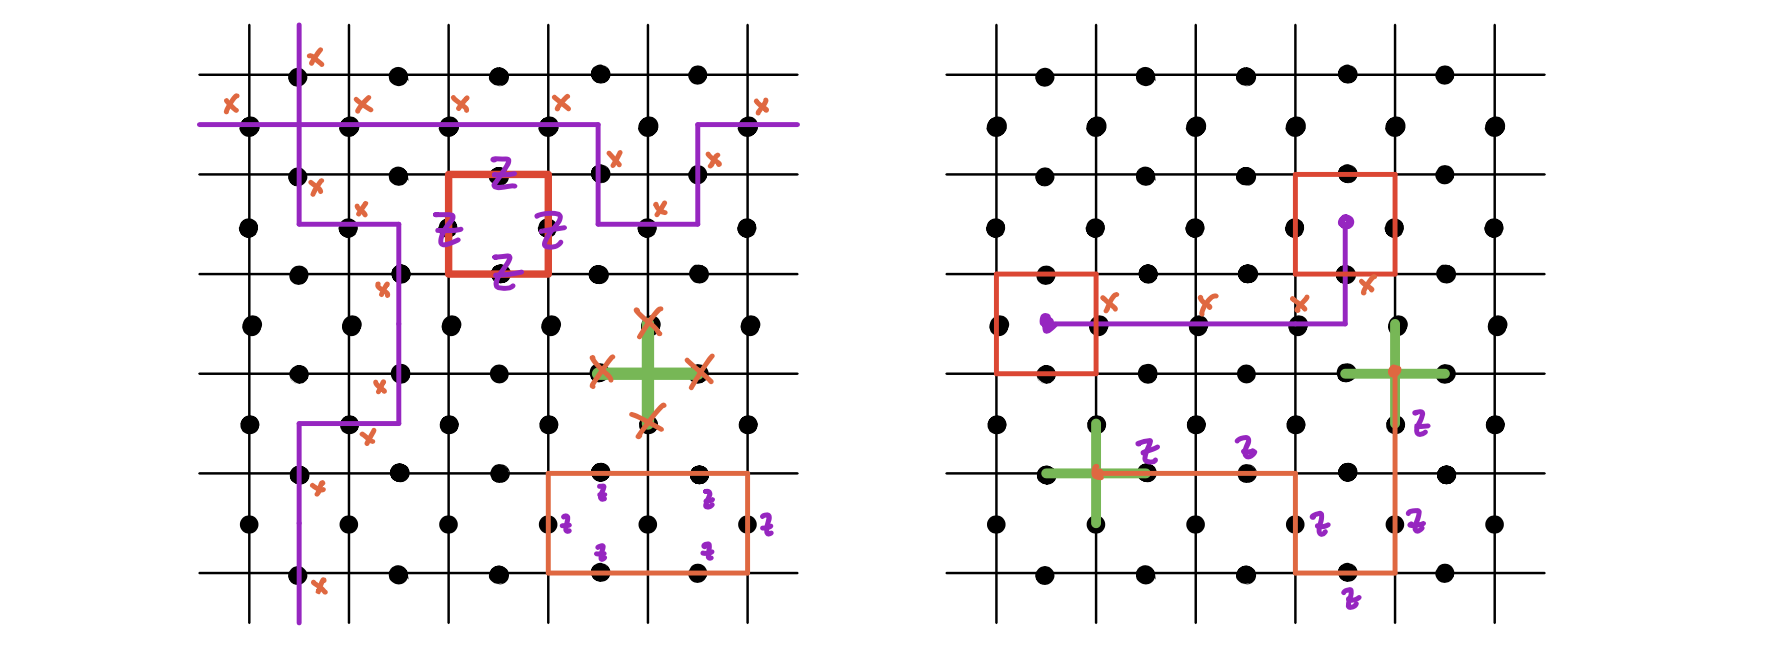

#### The Toric Code (Face Representation Qubits on vertices)

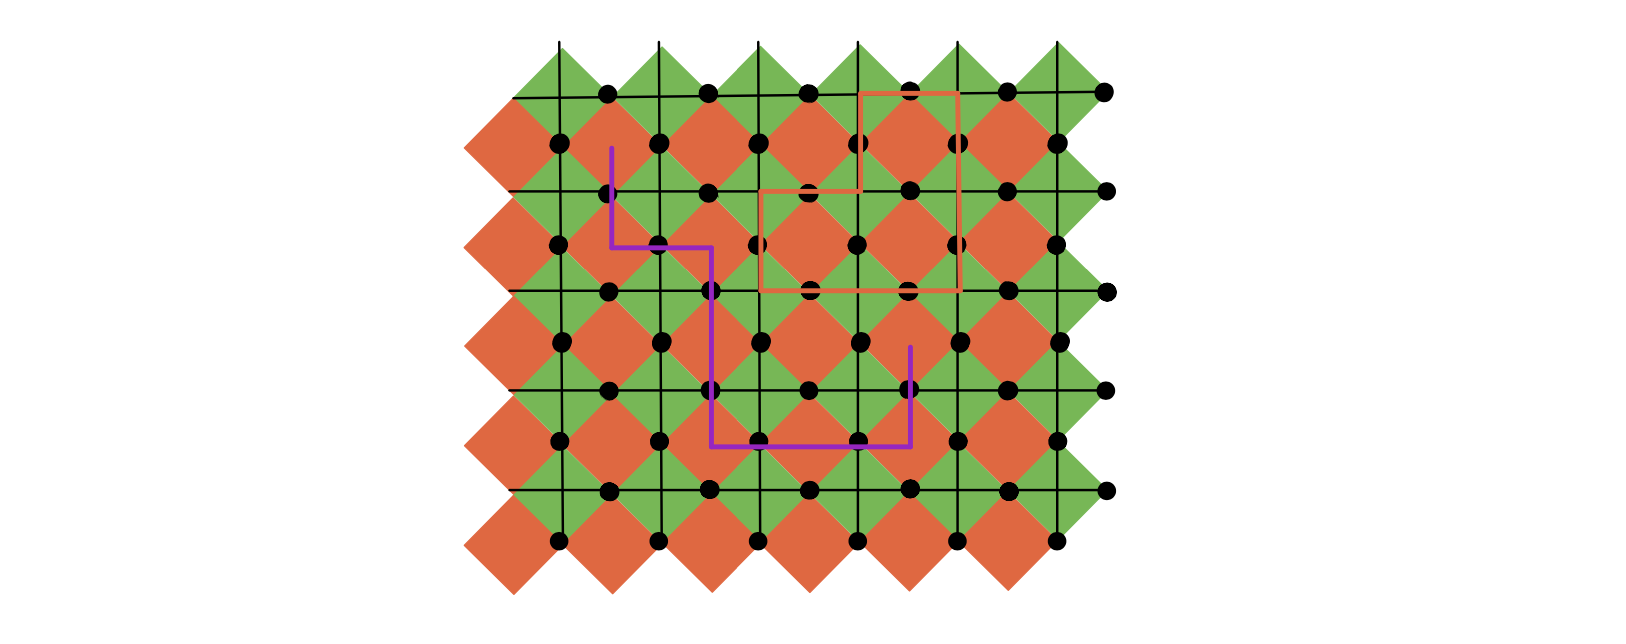

#### Rorated Surface Code (Face Representation - Qubits on vertices)

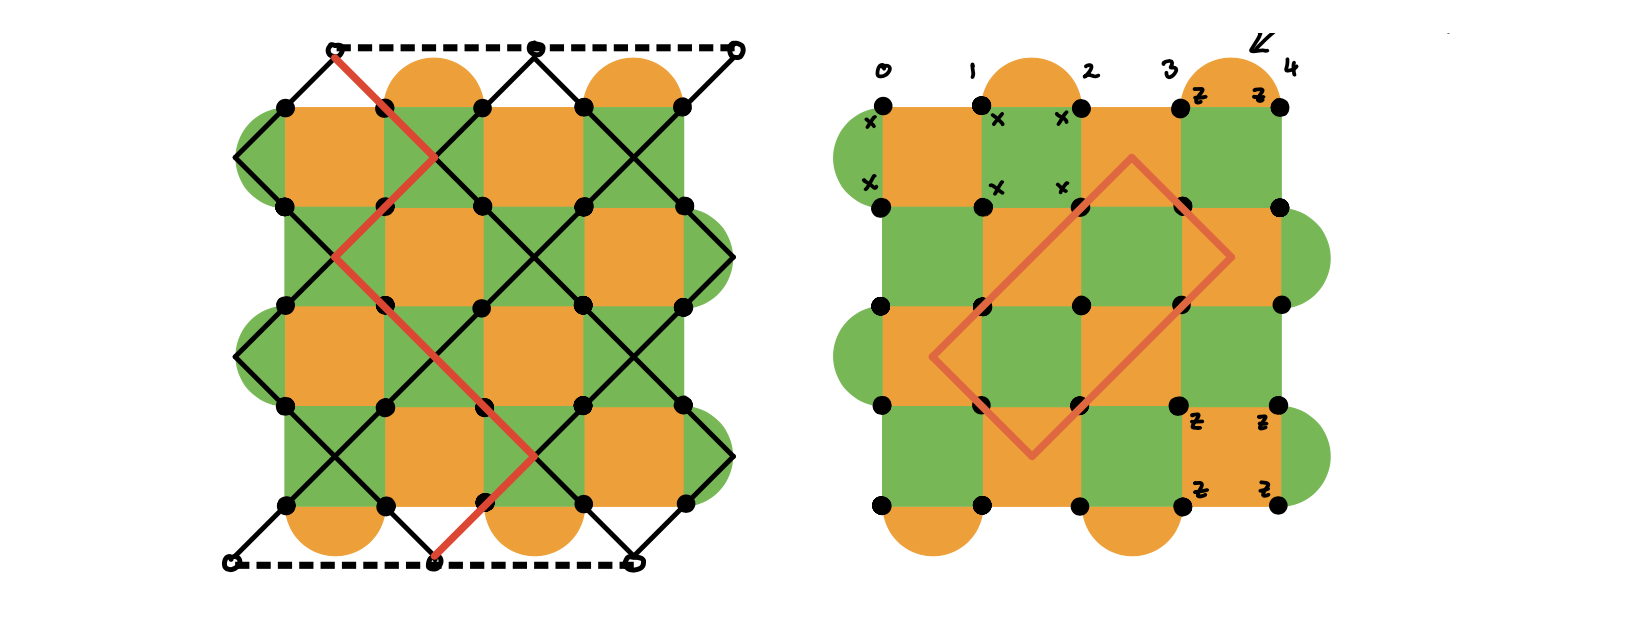

### Gauge Groups

**Definition** Let $\mathcal{G}\leq\mathcal{P}_n$ be any subgroup (not necessarily abelian) such that $Z(\mathcal{G})$ is either $\langle iI,S\rangle$ or $\langle -I,S\rangle$ or $\langle S\rangle$ such that $-I\not\in S$. The subgroup $\mathcal{G}$ is referred to as a **gauge group** and $S$ is considered the associated stabilizer group. 

A stabilizer group is simply an abelian subgroup of $\mathcal{P}_n$ such that $-I\not\in S$ and a gauge group is simply a subgroup of $\mathcal{P}_n$ that is not necessarily abelian. In both cases there is an associated stabilizer group $S$.

In [24]:
# Create a Gauge Group
from qiskit_qec.structures.gauge import GaugeGroup

matrix = np.array(
    [
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

generators = PauliList(matrix)
gauge_group = GaugeGroup(generators)
print(f"G = ⟨{gauge_group.generators}⟩")

G = ⟨['X0X1X2X3', 'Z0Z1Z2Z3', 'X1X3X4X5']⟩


<div class="alert alert-block alert-info">
    <b>Note:</b> Within the QEC Framework there is only a <tt>GaugeGroup</tt> class and no Stabilzer class. This is because internally it views a stabilzier group as simply an abelian gauge group and finds the code by a group character defintion.
</div>

## Finding Logical Operators

One simple but important computational problem is to find a set of representatives for logical operators and gauge operators of a subsystem stabilizer code. This problem can be solved efficiently. We will use the method based on the Gram-Schmidt process described previously which uses symplectic geometry as propose by Wilde [Arxiv 0903.5256]. For Stabilizer codes there is also the approach by Gottesman [PhD Dissertation, Sect 4]. 

From the defintion above we see that to find the logical operators we need only find generating sets for $C(\mathcal{G})\setminus \mathcal{G}$ to get the logical operators and $C(S)\setminus \mathcal{G}$ for t he dressed logical operators.

### Centeralizer and Normalizer

**Definition**
The **centralizer** of the stabilizer group with respect to the effective Pauli group is

$$
C_{\mathcal{P}_n}(S) = \{ P\in \mathcal{P}_n |\ \forall s\in S, Ps=sP\}.
$$

For subgroups $S$ such that $-I\not\in S$ the centralizer is equal to the **normalizer**:

\begin{align}
N_{\mathcal{P}^*_n}(S) &= \{ P\in \mathcal{P}_n\ |\ PSP^{-1}=S\} \\
&= \{ P\in \mathcal{P}_n\ |\ PSP^\dagger=S\} 
\end{align}

Elements of the centralizer that are not in the stabilizer group are called logical operators.

In [29]:
from qiskit_qec.linear.symplectic import normalizer

a = np.array([[1, 1, 1, 0, 1, 0, 0, 1]], dtype=np.bool_)
# x = np.array([[0, 1, 0, 0, 1, 0, 1, 0]], dtype=np.bool_)
# z = np.array([[0, 0, 0, 0, 1, 1, 0, 1]], dtype=np.bool_)
# center_, x_new, z_new = normalizer(a, x, z)
center_, x_new, z_new = normalizer(a)
# print(f"G        = ⟨{PauliList(a)+PauliList(x)+PauliList(z)}⟩")
print(f"G        = ⟨{PauliList(a)}⟩")
print(f"N_Pn(G) = ⟨{PauliList(center_)+PauliList(x_new)+PauliList(z_new)}⟩\n")
print(
    f"stabilizers = {PauliList(center_)}\n  logical_x = {PauliList(x_new)}\n  logical_z = {PauliList(z_new)}"
)

G        = ⟨['Y0X1X2Z3']⟩
N_Pn(G) = ⟨['Y0X1X2Z3', 'X0X3', 'X2', 'X1', 'Z3', 'X0Z2', 'X0Z1']⟩

stabilizers = ['Y0X1X2Z3']
  logical_x = ['X0X3', 'X2', 'X1']
  logical_z = ['Z3', 'X0Z2', 'X0Z1']


### Stabilizer Subsystem Codes

Stabilizer codes were generalized to the setting of operator quantum error correction by David Poulin [Pou05]. In this setting,
we encode into a subsystem of the code space.

Let $\mathcal{G}$ be an $n$-qubit gauge group and let $S$ be its associated stabilizer group. If $\mathcal{G}$ is abelian then set $\mathcal{G}=S$ and proceed defining the code as before. If $\mathcal{G}$ is non-abelian then there exists an minimal isotropic-hyperbollic generating set and a positive integers $m$ and $r$ such that


$$
\mathcal{G} = \langle \alpha, Z'_1,Z'_2,...,Z'_{m-2r}, \underbrace{X'_{m-2r+1},Z'_{m-2r+1},...,X'_{m-r},Z'_{m-r}}_{\text{$r$ hyperbolic pairs}}  \rangle
$$

where $m=d(\mathcal{G})$ and $\alpha$ may be either $-I$, $iI$ or nothing. We can extend this generating set to a minimal generating set for the full Pauli group $\mathcal{P}_n$ such that

$$
\mathcal{P}_n = \langle iI, X'_1,Z'_1,...,X'_n,Z'_n \rangle
$$

Normally we write $k=n-m+r$ and from this can easily derive the following:

\begin{align}
\mathcal{G} &= \langle \alpha, Z'_1,Z'_2,...,Z'_{n-k-r}, \underbrace{X'_{n-k-r+1},Z'_{n-k-r+1},...,X'_{n-k},Z'_{n-k}}_{\text{$r$ hyperbolic pairs}}  \rangle \\
Z(\mathcal{G}) &= \langle \alpha, S\rangle \\
S &= \langle Z'_1,...,Z'_{n-k-r} \rangle \\
C_{\mathcal{P}_n}(S) &= \langle iI, Z'_1,Z'_2,...,Z'_{n-k-r}, \underbrace{X'_{n-k-r+1},Z'_{n-k-r+1},...,X'_{n},Z'_{n}}_{\text{$k+r$ hyperbolic pairs}}  \rangle 
= N_{\mathcal{P}_n}(S) \\
C_{\mathcal{P}_n}(\mathcal{G}) &= \langle iI, Z'_1,Z'_2,...,Z'_{n-k-r}, \underbrace{X'_{n-k+1},Z'_{n-k+1},...,X'_{n},Z'_{n}}_{\text{$k$ hyperbolic pairs}}  \rangle
\end{align}

Note that  

$$
C_{\mathcal{P}_n}(S) = \mathcal{G}\circ C_{\mathcal{P}_n}(G)
$$

where $\circ$ is the central product of groups. You will also sometimes see

$$
D(\mathcal{G}) = \langle X'_1,X'_2,...,X'_{n-k-r} \rangle
$$

The group $D(\mathcal{G})$ is called the destabilizer group. The elements of the destabilizer group are referred to as destabilizers or pure errors. Conjugating the stabilizer generators by elements of this group changes their sign, but the destabilizers commute with the generators of the normalizer that are not in $S$.

Let $C=C(S)$ be the principal stabilizer code subspace associated with $S$. The subsystem stabilizer code defined by $G$ is the subsystem $A$ of $C=A\otimes B$ on which $\mathcal{G}$ acts as the identity. $\mathcal{G}$ is the gauge group of the code, and the elements of $\mathcal{G}$ are called **gauge operators**. The subspace $C$ has dimension $2^{k+r}$ and factors into a protected subsystem $A$ encoding $k$ qubits and a subsystem $B$ with $r$ gauge qubits.

<div class="alert alert-block alert-info">
    <b>Note:</b> The choice of the principal code subspace is arbitary but us standard practice for theoretical papers and note that under this way of defining gauge codes different gauge groups can define the same code. e.g. $\langle S \rangle$ and $\langle -I, S \rangle$.
</div>

**Definition** Elements of $C(\mathcal{G})\setminus \mathcal{G}$ are called bare logical operators, and elements of $C(S)\setminus \mathcal{G}$ are called dressed logical operators.

In [30]:
from qiskit_qec.codes.stabsubsystemcodes import StabSubSystemCode
from qiskit_qec.linear.symplectic import make_isotropic_hyperbolic_form

G = GaugeGroup(PauliList(["X1Y3", "X2X3Y4", "Z1Z5"]))
code = StabSubSystemCode(G)

cen, x, z = make_isotropic_hyperbolic_form(G.generators.matrix)
print(f"G={PauliList(cen) + PauliList(x) + PauliList(z)}")

G=['Z1X2X3Y4Z5', 'X1Y3', 'X2X3Y4']


**Example: SubSystem Surface Code**

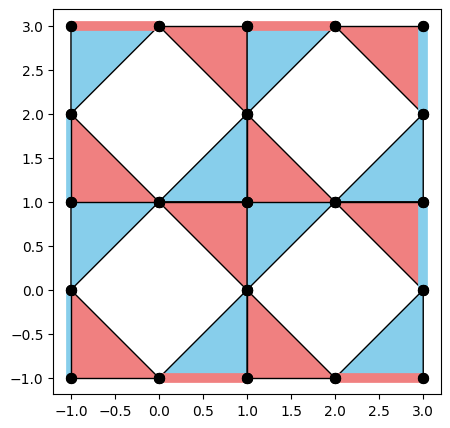

In [31]:
from qiskit_qec.codes.codebuilders.subsystem_surface_code_builder import SubsystemSurfaceCodeBuilder

code = SubsystemSurfaceCodeBuilder(d=5).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue", figsize=(5, 5))

## Finding Mininal Distances

The support of a Pauli operator $P$ is the set of coordinates whose associated Pauli operator is not the identity,

\begin{equation}
\mathrm{supp}(P) = \{ i\in [n]\ |\ P_i\neq I \}.
\end{equation}

The weight $|P|$ of a Pauli operator $P$ is the size of the support $|P| = |\mathrm{supp}(P)|$.

**Definition**
The minimum distance of a subsystem stabilizer code with $k>0$ is

\begin{equation}
d = \min_{P\in C(S)\setminus G} |P| = \min_{P\in C(\mathcal{G})\setminus \mathcal{G}} \min_{g\in \mathcal{G}} |gP|.
\end{equation}

In the special case where $k=0$,

\begin{equation}
d = \min_{P\in \mathcal{G}\setminus \{I\}} |P|.
\end{equation}

A stabilizer subsystem code encoding $k$ qubits into $n$ qubits with $r$ gauge qubits and distance $d$ is called an $[[n,k,r,d]]$ subsystem stabilizer code.

Computing the minimum distance of a binary linear code is NP-hard \cite{vardy1997}.
The minimum distance of a linear code is not approximable to within any constant factor in random polynomial time (RP), unless NP equals RP \cite{dumer2003}. Exactly computing the distance of a quantum CWS code is NP-complete, and multiplicatively or additively approximating it is NP-hard under polynomial-time randomized reductions \cite{kapshikar2022}. Nevertheless, it is valuable to know the minimum distance of particular codes whenever possible.

### Basic algorithm for the minimum distance of (subsystem) stabilizer codes

Our first algorithm for computing the minimum distance follows directly from the definition. The minimum distance for a code with $k>0$ is the minimum weight Pauli operator that commutes with all of the elements of $S$ but does not belong to $\mathcal{G}$. Therefore, a straightforward approach is to iterate over all Pauli errors $E\in {\cal P}_n$ such that $|E|=1, 2, \dots, n$. For each error $E$, we test if $E$ commutes with each of the $n-k$ generators $s_i$ of $S$. If so, we need to test if $E\in G$. One approach to this membership test is to construct a matrix $M$ of the subsystem code whose rows are $g_1, g_2, \dots, g_m, E$. If $E\in \mathcal{G}$, then there is a product / linear combination of rows that equal $E$ and the rank of $M$ is $m$. Otherwise, $M$ has full rank $m+1$. In the latter case, we have found an error $E\in C(S)\setminus \mathcal{G}$, so we return its weight $|E|$.

For a distance $d$ code, we enumerate no more than

\begin{equation}
\sum_{w=1}^d 3^w{n\choose w} \leq \sum_{w=1}^d \frac{(3n)^w}{w!} = \sum_{w=1}^d \frac{d^w}{w!}\left(\frac{3n}{d}\right)^w \leq \left(\frac{3n}{d}\right)^d e^d = \left(\frac{3ne}{d}\right)^d
\end{equation}

Pauli errors. For each of these errors, we test commutation and compute the rank of a matrix, which can be done in $O(n^3)$ operations. The total number of operations is $O(n^3\left(\frac{3ne}{d}\right)^d)$.

### Improved algorithm for computing the minimum distance

Let $\bar{P}$ be a logical Pauli operator of a stabilizer code. Our goal is test if there is a Pauli error $E$ of weight less than or equal to $w$ such that $\textrm{synd}(E)=0$ and $E\bar{P}=-\bar{P}E$. Choose $w_1+w_2=w$ such that $w_1\approx w_2$. Construct the sets

\begin{align}
T_{i,c} & = \{\textrm{synd}(E):[E,\bar{P}]=0, |E|=w_i\} \\
T_{i,a} & = \{\textrm{synd}(E):[E,\bar{P}]\neq 0, |E|=w_i\}.
\end{align}

Suppose there is a syndrome $s$ in $T_{1,c}\cap T_{2,a}$ or $T_{1,a}\cap T_{2,c}$. Then there is an error $E$ with $|E|\leq w$ such that $\textrm{synd}(E)=0$ and $E\bar{P}=-\bar{P}E$.

This new algorithm will enumerate at most

\begin{equation}
2\left(\frac{3ne}{w_1}\right)^{w_1} = 2\left(\frac{6ne}{w}\right)^{w/2}
\end{equation}

Pauli errors assuming $w_1>w_2$. We can compute the syndrome $\sigma(E)$ for all weight-1 errors $E$ and use the fact that $\sigma(EE')=\sigma(E)+\sigma(E')$. Set intersection can be tested in time proportional to the size of the smallest set, which again is proportional to the total number of Pauli errors. The total number of operations is
$O(\left(\frac{6ne}{w}\right)^{w/2})$.

If we choose $\bar{P}$ uniformly at random from the set of logical Pauli operators, then with probability $1/2$, the minimum weight operator anticommutes with it. Alternatively, we can test each of the $2k$ logical operators in a basis.

The minimum distance can be computed by calling this subroutine for each weight up to $d$, so the total time complexity is $O(\left(\frac{6ne}{d}\right)^{d/2})$.

**Exercise:**  Review the literature and implement improved algorithms to compute or bound the minimum distance of subsystem stabilizer codes, either in general or specialized to families of codes with certain properties.


In [32]:
from qiskit_qec.analysis.properties import minimum_distance

# 3x3 Bacon-Shor code
gauge_op_strs = [
    "XIIXIIIII",
    "IXIIXIIII",
    "IIXIIXIII",
    "IIIXIIXII",
    "IIIIXIIXI",
    "IIIIIXIIX",
    "ZZIIIIIII",
    "IZZIIIIII",
    "IIIZZIIII",
    "IIIIZZIII",
    "IIIIIIZZI",
    "IIIIIIIZZ",
]
gauge_op_strs = [
    "X0X3",
    "X3X6",
    "Z0Z1",
    "Z4Z5",
    "X1X4",
    "X4X7",
    "Z1Z2",
    "Z6Z7",
    "X2X5",
    "X5X8",
    "Z3Z4",
    "Z7Z8",
]
gaugegroup = GaugeGroup(gauge_op_strs)
bacon_shor_code = StabSubSystemCode(gaugegroup)
minimum_distance(bacon_shor_code.generators.matrix)

3

In [34]:
# [[17,1,7]] code from codetables.de
generators = PauliList(
    [
        "YZIZZZIZIZIZZZIZY",
        "IXZZIIZZZZZZIIZZX",
        "ZZXIIZIIZIZIIZIIX",
        "ZIZYZZZZIIIIZZZZY",
        "IIIIXIZIZZIZZIZIX",
        "ZZIZZYIIIIZZIIIIY",
        "IIZZIIYZIZIIIZIZY",
        "IZIIIZIXZZZZZZZZX",
        "ZZZZZZZZXIZIIIZIX",
        "ZIZIIIZIZYIIZZIIY",
        "IIIIZZIIIIYZZIZZY",
        "IZIZZIZZIZIXIIIIX",
        "ZZZZIIIIZZZZYZIZY",
        "IIZIIZIZIIZIIXZZX",
        "ZZIIZZZZZZIIZZXIX",
        "ZIZZZIZIZIZZZIZYY",
    ]
)

gaugegroup = GaugeGroup(generators)
code_17_1_7 = StabSubSystemCode(gaugegroup)

In [35]:
# minimum_distance(code_17_1_7.generators.matrix)
minimum_distance(code_17_1_7.generators.matrix, max_weight=10, method="enumerate")

7

In [36]:
minimum_distance(code_17_1_7.generators.matrix, max_weight=10, method="partition")

7

### Clifford Groups

The complex infinite Clifford group over $n$-qubits is defined by

\begin{align}
C_n^{\infty}=\mathcal{N}_{U(2^n)} (\mathcal{P}_n)  &= \{ T\in U(2^n): T\mathcal{P}_nT^{-1}=\mathcal{P}_n\} \\
&= \{ T\in U(2^n): T\mathcal{P}_nT^{\dagger}=\mathcal{P}_n\} \\
&= \begin{cases} 
\langle e^{i\theta}I, H, S \rangle & \textrm{if $n=1$} \\
\langle e^{i\theta}I, H_j, S_j, \textrm{CNOT}_{ij} \rangle & \textrm{if $n>1$}
\end{cases}
\end{align}

where $H$ is the Hadamard operator and $S$ is the phase operator with the following matrix representations relative to the standard basis:

$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\quad
S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}
$$

Note that $(HS)^3 = \eta I$ where $\eta$ an eighth root of unity. The finite complex Clifford group $C_n\leq C_n^\infty$ is defined by

\begin{align}
C_n = \begin{cases} 
\langle H, S \rangle & \textrm{if $n=1$} \\ 
\langle H_j, S_j, \textrm{CNOT}_{ij} \rangle & \textrm{if $n>1$}
\end{cases}
\end{align}

Elements of $C_1$ acting on Pauli operators in $\mathcal{P}_1$ via $\dagger$-conjugation are acting as a permutations of the set $\{I,X,Z,Y\}$ with a possible change in complex coefficient. In fact it can be show that $C_1/\langle \eta I, \mathcal{P}_1\rangle \eqsim S_3$. These 6 elements are

\begin{align}
I &:= () \qquad I,\, HS^2H=X,\, S^2=Z,\, HS^2HS^2=Y\,,...) \\
R &:=(XYZ) \qquad HS^3,\, S^2HS, HS,\, S^2HS^3,\, ...\\
R^{-1} &:= (ZYX) \qquad SH,\, S^3H,\, SHS^2,\, S^3HS^2,\, ...\\
H &:= (XZ) \qquad H,\, S^2H,\, HS^2,\, S^2HS^2,\, ...\\
S &:= (XY) \qquad S,\, HS^2HS^3,\, S^3,\, HS^2HS,\, ...\\
V &:= (YZ) \qquad HS^3H,\, HSH,\, SHS^3,\, S^3HS,\, ...
\end{align}




### Finding Equivalent Subsystem Codes

Depending on what you are studying there you can define different equivalance relations on the set of equivalence codes. When are two $n$-qubit stabilizer code equivalent? Consider codes that are protecting against a depolarizing noise channel:

$$
\mathcal{E}(\rho) =(1-p)\rho + \frac{p}{3}(X\rho{X^\dagger}+Z\rho{Z^\dagger}+Y\rho{Y^\dagger})
$$

This channel is symmetric under permutations in $S_{\{I,X,Z,Y\}}$. Thus a reasonable defintion of equivalence in this situation is that two stabilizer subsystem codes are equivalent if their defining groups are equal under some permutation of qubits and permutation of $\{I,X,Z,Y\}$ (so $\dagger$-conjugation by a local Cliffords. That is two $n$-qubit stabilizer subsystem codes $\mathcal{G}_1$ and $\mathcal{G}_2$ are equivalent if there exists some permutation in $S_n$ and a local Clifford $U \in C^{\otimes n}_1$ such that

$$
\mathcal{G}_1 = U\mathcal{G}^\pi_2 U^{\dagger}
$$

For simplicity we can write $U\mathcal{G}^\pi U^{\dagger} = (U,\pi)\circ \mathcal{G}$ and if we ignore coeffients then these elements can be considered isomorphic to the group $S_3 \wr S_n$

**Definition** (Automorphism group of a stabilizer subsystem code)

A subgroup of $S_3 \wr S_n$ that takes a gauge group $\mathcal{G}$ to itself:

$$
\textrm{Aut}(\mathcal{G}) := \{ (h,\pi) \in S_3 \wr S_n : (h,\pi)\circ P \in \mathcal{G} \quad\textrm{for all $P\in\mathcal{G}$}\}
$$

**Example: Four Qubit Code**
Consider the [[4,1]] stabilizer subsystem code defined by 

$$
S = \langle XXXX, ZZZZ \rangle \quad\textrm{with}\quad (XIXI,IIZZ) \quad\textrm{as the gauge hyperbolic pair}
$$

thus $\mathcal{G} = \langle iI, XXXX, ZZZZ, XIXI,IIZZ \rangle$. In this case the logical operators are $IIXX$ and $ZIZI$ and the destabilizers are $IZII$ and $XIXX$. These can be calculated as show before in calculating isotropic-hyperbolc generating sets and logical operators.

It is not diffiult to see that $\textrm{Aut}(S) = S_3 \wr S_n$. It can also be shown, via inspection or calculation, that 

$$
\textrm{Aut}(\mathcal{G}) = \langle (H^{\otimes 4},(23)), (I^{\otimes 4},(12)(34))\rangle < S_3 \wr S_n
$$

These operators perserve the code space but they may not do anything useful or interesting. Looking at how different elements act shows that:

\begin{align}
Element  &\qquad Action  &Comment  \\ 
(I^{\otimes 4},(12)(34))  &\qquad I_A\otimes I_B  &\textrm{Does not entangle $A$ and $B$} \\
(H^{\otimes 4}, (23)) &\qquad H_A\otimes H_B  &\textrm{Does not entangle $A$ and $B$} \\
(I^{\otimes 4},(23))  &\qquad\textrm{SWAP}_{AB}  &\textrm{Exchange} \\
(I^{\otimes 4},(34))  &\qquad\textrm{CNOT}_{AB}  &\textrm{Entangle} 
\end{align}

On the other hand, $(23)\in\textrm{Aut}(S)$ but $(23)\notin\textrm{Aut}(G)$. 

**Goal: Find the equivalence classes of Stabilizer Groups for n<100 qubits**

This calculation has been carried out for $n$ up to about 10 so far and we are currently looking at ways to explore and find equivalence classes for $n>10$. We do not yet have the generators computed for $\textrm{Aut}(S)$ but we have cacluated its cardinatity. Details on this calculation and results will be released soon and the associated code will be released into the Qiskit-QEC framemwork. GAP code exists to calculate the generators for the automorphisms groups and will also be released. Some data from this calculation is available in the current release of qiskit-qec and is managed by the Code Librarian class.

In [40]:
# Start the CodeLibrarian
import qiskit_qec.codes.codebase as cb

# This will set the default output format to index format and read product syntax
# Pauli strings from left-to-right
import qiskit_qec.utils.pauli_rep as pauli_rep
from qiskit_qec.operators.base_pauli import BasePauli

BasePauli.set_syntax(pauli_rep.INDEX_SYNTAX)
BasePauli.set_qubit_order("left-to-right")

# Load the code with n=5, k=0 and the index = 1 then show its generators
code = cb.small_code(5, 0, 1)
code.gauge_group.generators

PauliList(['X1', 'X2', 'X3', 'Z0Z4', 'Y0Y4'])

### Code Library/Database
Qiskit-QEC contains a CodeLibrarian that manages various CodeLibrary instances that store a range of codes and their properties. This code database will eventually be hosted on a separate web server as the number of possible codes (even under local Clifford and permutation equivalance) grows very quickly. This database is meant to be analogous to GAP's small group database or Sloan's encyclopedia of integer sequences.

Different codebases are packaged as code libraries and managed by a `CodeLibarian` class.


```
├── qiskit_qec
        └── codes
              └── codebase
                    └── data
                          ├── base
                          ├── ldpc
                          └── config.ini
        
```

The `data` directory contains the different code libraries with the `base` directory contains the stabilzier equivalent codes as described above. A dummy `ldpc` directory exists as a current example of another database - although it really contains no data. There are simple config files that state how large the libraries are and what file formats the filenames are in. The config files also tell the `CodeLibrarian` if the data should be loaded into memory, search locally via files or via a link to an external server (to be added later).

Currently the base code library only ontains codes up to $n=5$. Access to the other data is comming soon.

The `CodeLibraian` is started by simply issuing the command:

In [ ]:
# Start the CodeLibrarian
# import qiskit_qec.codes.codebase as cb

The syntax for the codebases is similar for GAP's small group database. You can search for a given code or set of code and return the codes themselves or just the infomation about the codes.

To find a specific code you can use the `small_code` method and provide ite with $[[n,k,d]]$ parameters. If you want to on get back the information the code then set the `info_only_ flag` to `True`.

Codes are indexed by $[[n,k,d]]$ and then an index that start from 0 for each set of $[[n,k,d]]$-codes.|


In [41]:
# Load the code with n=5, k=0 and index=4
code = cb.small_code(5, 0, 4)
code.generators

PauliList(['Z1Z2', 'Z0Z4', 'Y1Y2X3', 'Z0Z1Z3', 'Y0X3Y4'])

In [42]:
code.generators.matrix.astype(int)

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 1]])

In [43]:
# Load the code with n=5, k=0 and index=4 but only fetch the information on it
codes = cb.small_code(5, 0, 4, info_only=True)
codes.info

[[5,0]]-4 of type StabSubSystemCode
-------------------------------------------------------------------------------
isotropic_generators : ['Z1Z2', 'Z0Z4', 'Y1Y2X3', 'Z0Z1Z3', 'Y0X3Y4']
is_subsystem         : 1
index                : 4
code_type            : StabSubSystemCode
aut_group_size       : 32
is_triorthogonal     : 0
is_decomposable      : 0
weight_enumerator    : [1, 0, 2, 8, 13, 8]
is_css               : 1
uuid                 : 33f790cd-ab06-47fb-a2b3-057f38329942
is_degenerate        : 0
d                    : 2
is_gf4linear         : 0
k                    : 0
n                    : 5



There is also a method to find sets of codes using the available fields for a database. It uses the 
`all_small_codes` method

In [44]:
# Load all (1) small codes info with n=5 and k=2 that are not CSS with d=2
codes = cb.all_small_codes(5, 2, is_css=False, info_only=True, d=2)
codes.info

[[5,2]]-27 of type StabSubSystemCode
-------------------------------------------------------------------------------
isotropic_generators : ['Z0Z1X2', 'X1Z2X3Z4', 'X0X1Y3Y4']
logical_ops          : ['Z0X3', 'Z1X4', 'Z1Z3', 'Z0Z4']
is_subsystem         : 1
index                : 27
code_type            : StabSubSystemCode
aut_group_size       : 12
is_decomposable      : 0
weight_enumerator    : [1, 0, 0, 1, 3, 3]
is_css               : 0
uuid                 : 65e7ef69-1b5b-49a7-97f7-f41ca540cc8f
is_degenerate        : 0
d                    : 2
is_gf4linear         : 0
k                    : 2
n                    : 5



In [45]:
# Load all (1) small codes info with n=5 and k=1 that are not CSS and print details of their |Aut(S)|
codes = cb.all_small_codes(5, 1, info_only=True, is_css=False)
for code in codes:
    print(
        f" [[{code['n'],code['k'],code['d']}]] index={code['index']} aut_group_size={code['aut_group_size']}"
    )

 [[(5, 1, 2)]] index=20 aut_group_size=8
 [[(5, 1, 3)]] index=21 aut_group_size=360
 [[(5, 1, 2)]] index=26 aut_group_size=48
 [[(5, 1, 1)]] index=27 aut_group_size=16
 [[(5, 1, 1)]] index=31 aut_group_size=64


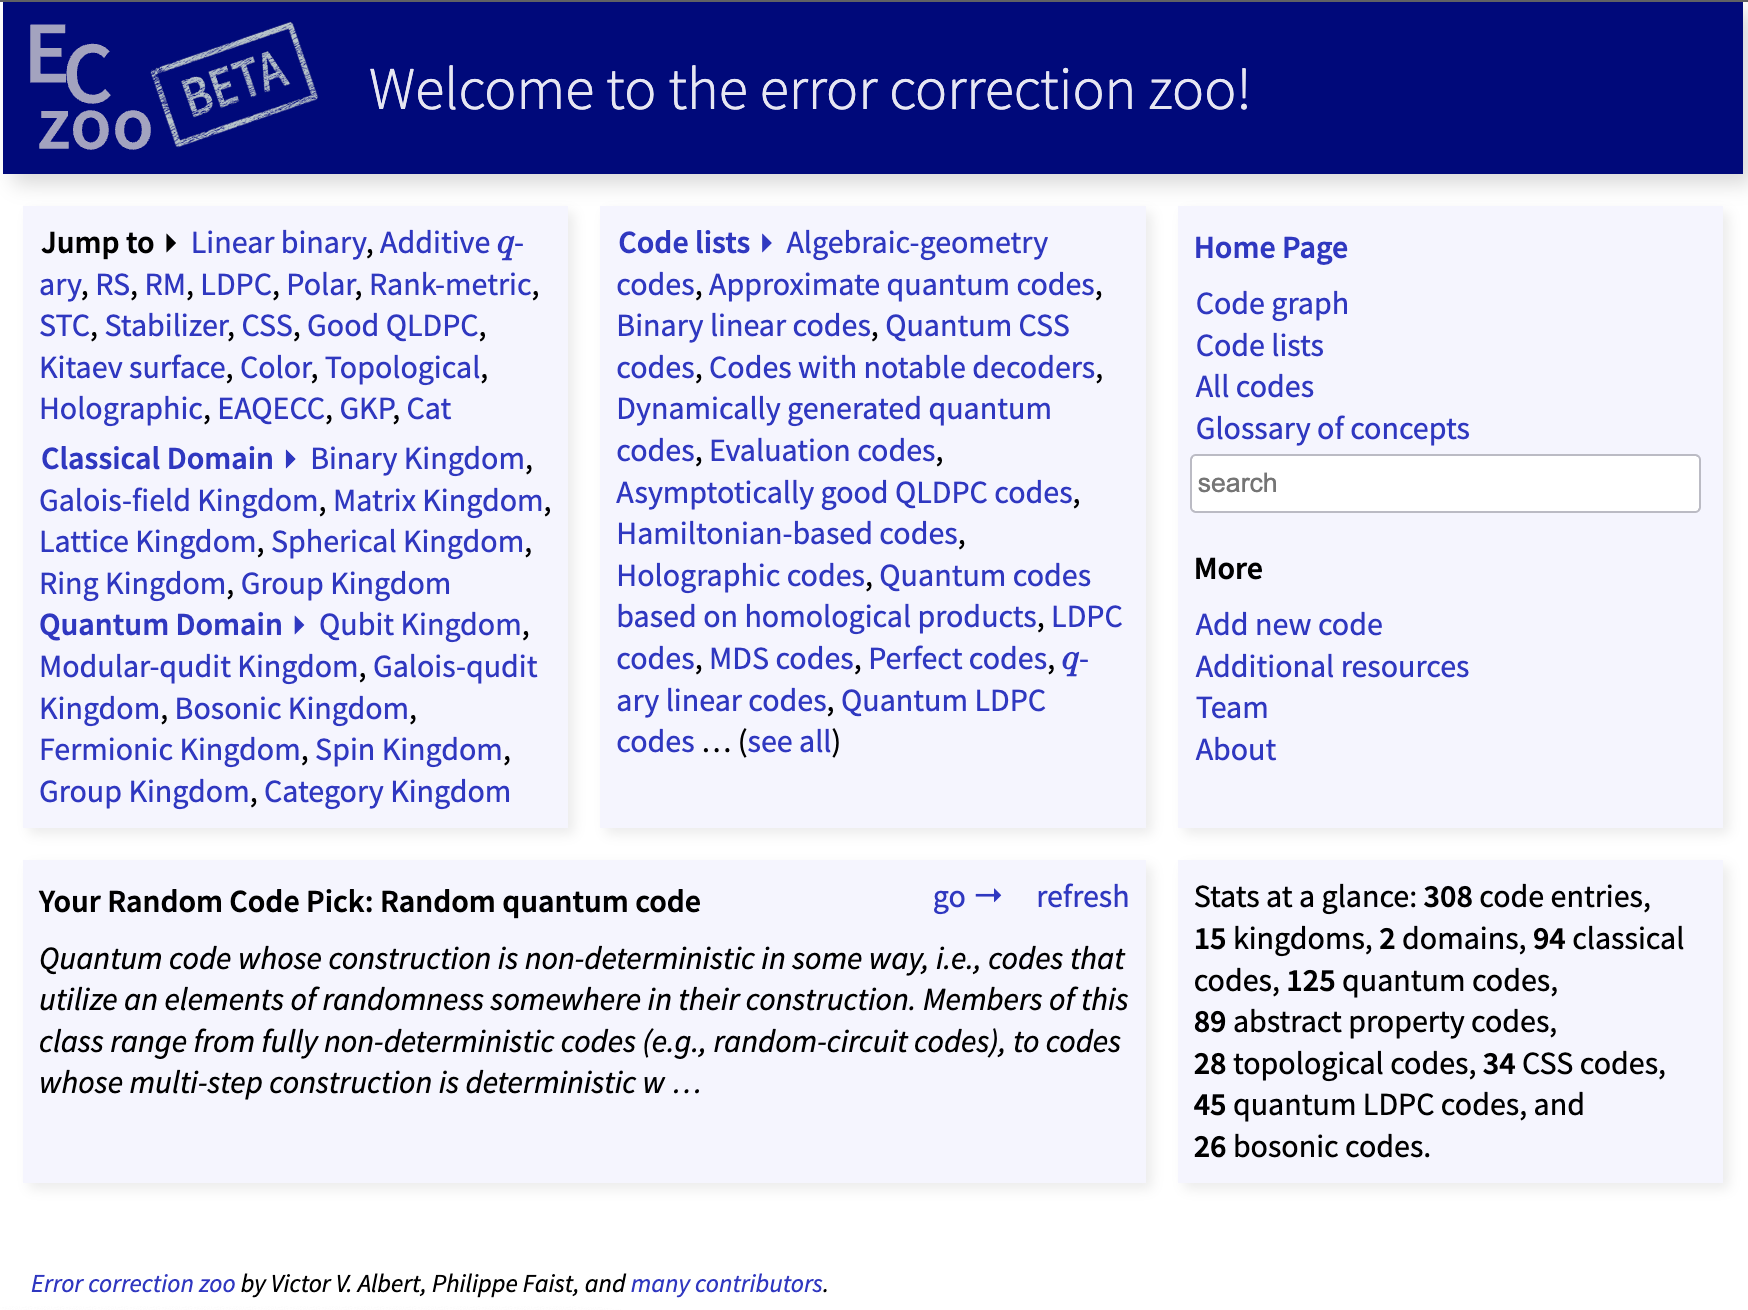

## Building Codes

### Code Classs

Within the framework there are very few specific code classes. This is done for two primary reasons. The first is that changes in codes (due to failures or gauge fixing or other) can easy take a code out of a given class wheere class methods not longer work and we want to avoid having to continually check if a code is still within an given class or whether a given operation keeps a code inside the class. Second, since there is no simple code heirachy that could be used the number of code classes would be large, overlapping and difficult to manage. Instead the aim is to only use a few classes such as the `StabSubSystemCode` class which deal with stabilizer subsystem codes.

### Code Factories

A code factory is a general method of constructing a wide range of codes rather than any specific code, of group of codes. A code factory usually has many different configuration parameters and options. Code factories inherit from the Factory class. An example is the `TileCodeFactory` which builds codes based on cutting and gluing regions cut from tiles placed on a lattice.

### Code Builders

A code builder is a method of constructing specific codes or groups of codes. Usually, the number of configuration parameters is small the builder is relatively easy to use. Code builders often utilize a specialize configured code factory but may not. For example the code builders `TriangularColorCodeBuilder` and `HeavyHexCodeBuilder` builder classes use the `TileCodeFactory` to build specific codes.

### Code Library/Database

Qiskit-QEC contains a CodeLibrarian that manages various CodeLibrary instances that store a range of codes and their properties. This code database will eventually be hosted on a separate web server as the number of possible codes (even under local Clifford and permutation equivalance) grows very quickly. This database is meant to be analogous to GAP's small group database or Sloan's encyclopedia of integer sequences.

### Creating Codes

There are many ways to create codes using the framework. These include

1. Creating a symplectic matrix
2. Providing the stabilizer/gauge generators as strings
3. Loading a code via the codebase libraries
4. Configuring and running a TileCodeFactory
5. Configuring and running a specific CodeBuilder
6. Writing a custom code class

We first consider creating the 7-qubit Steane/color code:

In [46]:
import numpy as np
from qiskit_qec.structures.gauge import GaugeGroup
from qiskit_qec.operators.pauli_list import PauliList
from qiskit_qec.codes.stabsubsystemcodes import StabSubSystemCode

# Create the 7-qubit Steane/color code
matrix = np.array(
    [
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
    ]
)

generators = PauliList(matrix)
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)
code.generators

PauliList(['X0X1X2X3', 'Z0Z1Z2Z3', 'X1X3X4X5', 'Z1Z3Z4Z5', 'X0X1X4X6',
           'Z0Z1Z4Z6'])

### Providing the stabilizer/gauge generators as strings

Codes can also be created by given a set of Pauli genertors described by strings.

In [47]:
# Strings need not be in product syntax but can be an many forms including index syntax
generators = PauliList(["X0X1X2X3", "Z0Z1Z2Z3", "X1X3X4X5", "Z1Z3Z4Z5", "X0X1X4X6", "Z0Z1Z4Z6"])
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)
code.generators

PauliList(['X0X1X2X3', 'Z0Z1Z2Z3', 'X1X3X4X5', 'Z1Z3Z4Z5', 'X0X1X4X6',
           'Z0Z1Z4Z6'])

## Surface Codes

For many interesting codes there are topological and geometrical representations of these codes that are useful for visualization the codes properties and creating new codes.

A common code that demonstrates that fact is the toric code and its cousin the rotated surface code.

### The Toric Code (Dual Representation - Qubits on edges)

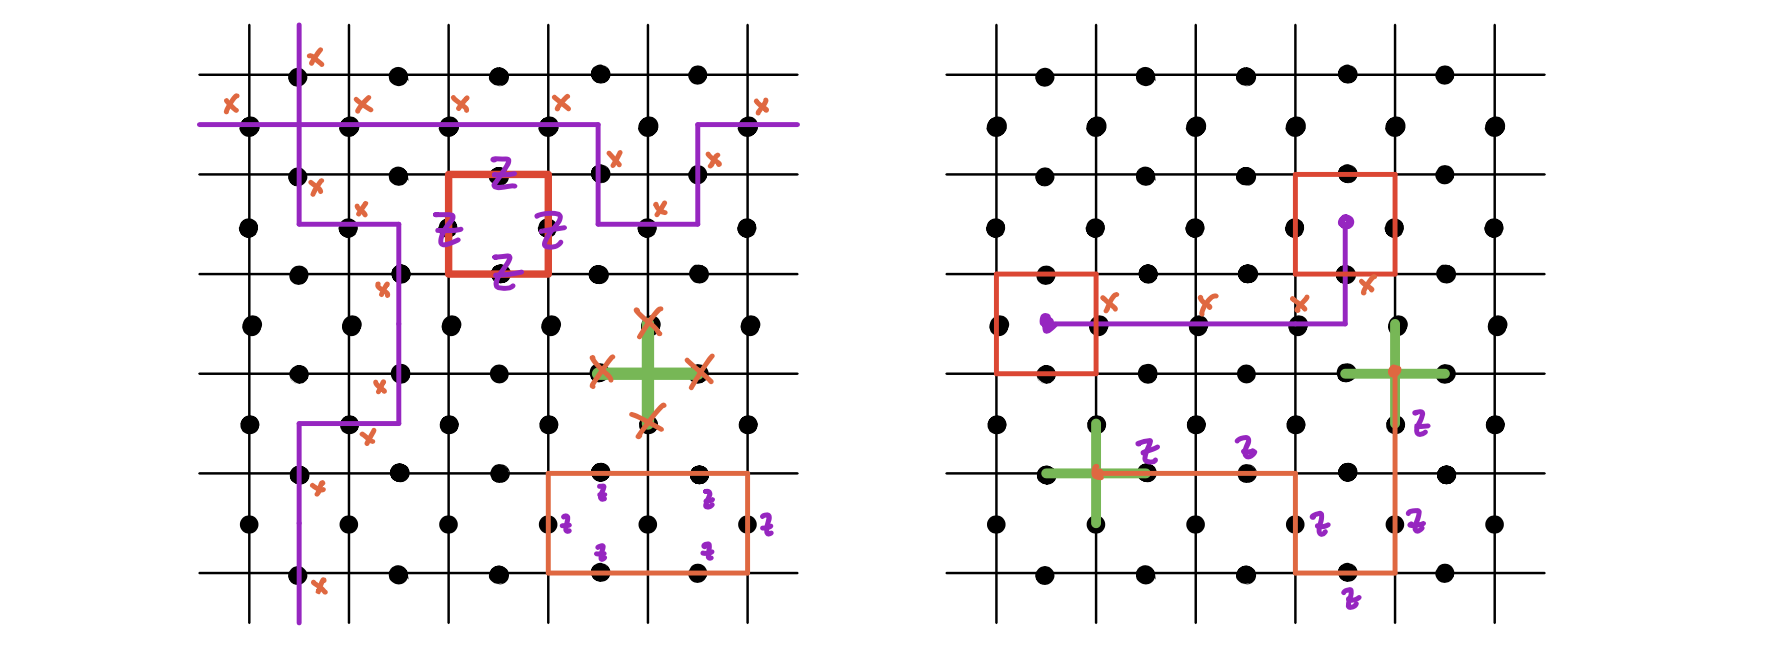

### The Toric Code (Face Representation Qubits on vertices)

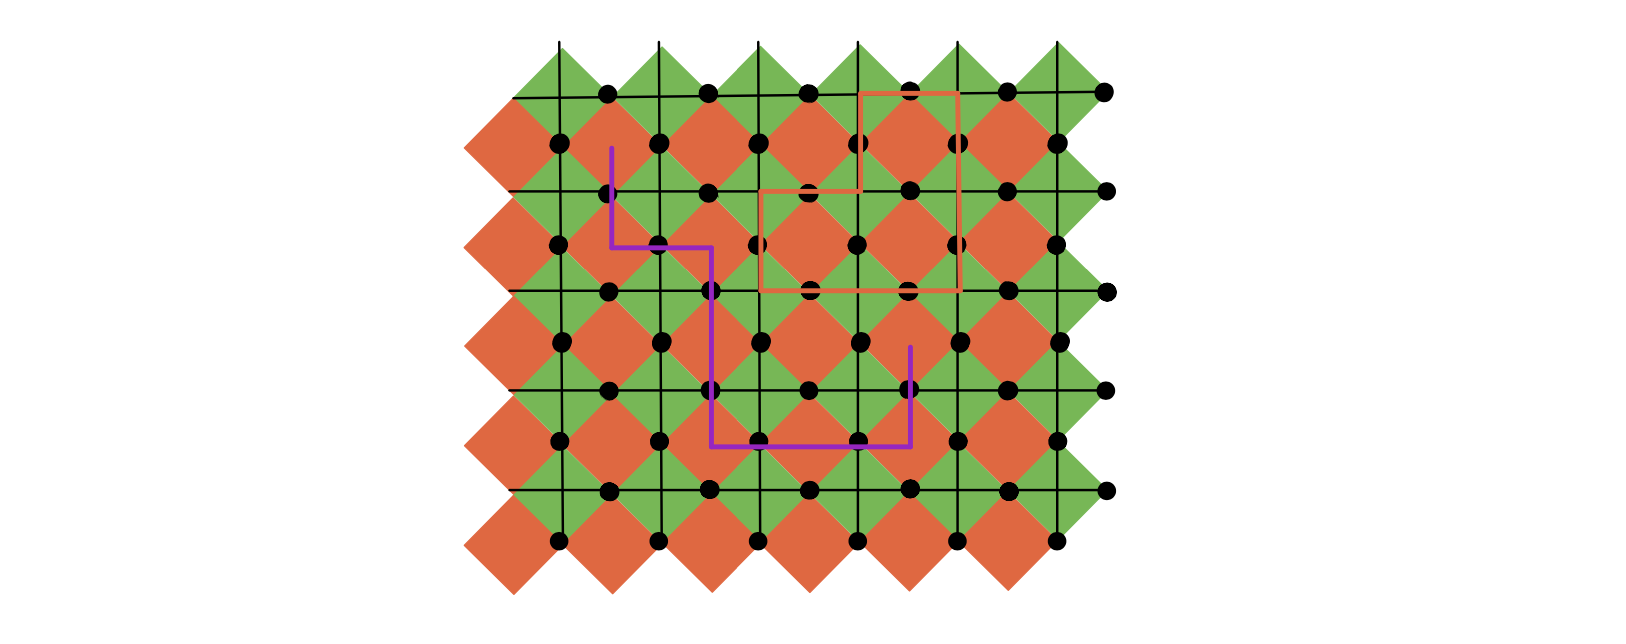

### Rorated Surface Code (Face Representation - Qubits on vertices)

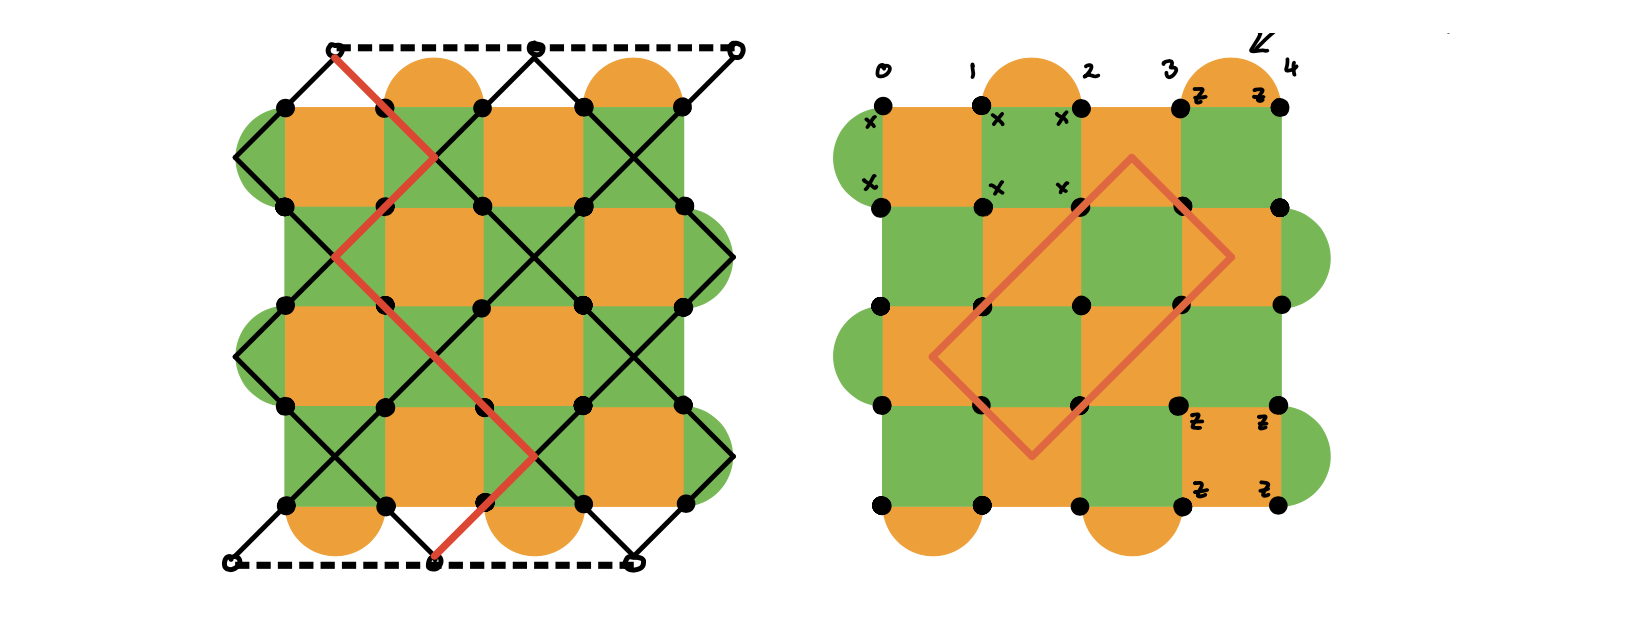


## TileFactories

The general concept that TileFactories uses relates to tiling/celluation of a region of some surface of which gauge operators are assigned to the cells inside the region along with the associated qubits. The operators/cells that are on the boundary are then modified according to some given appraoch to end up with a set of gauge group generators for a stabilizer subsystem code.

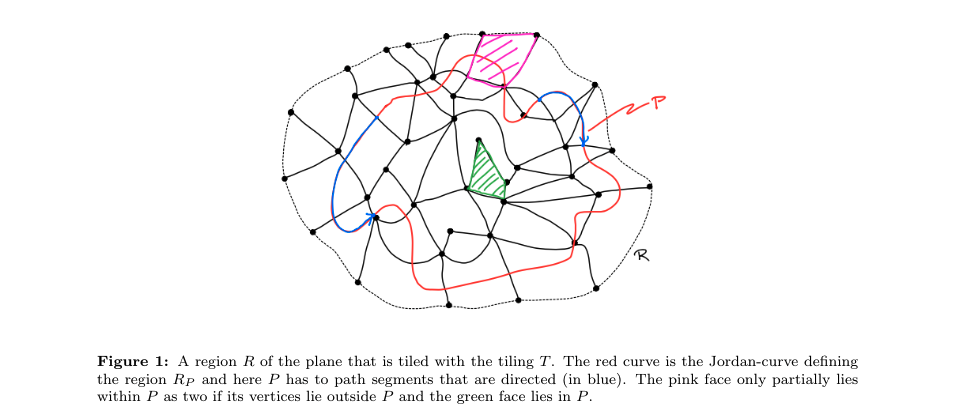

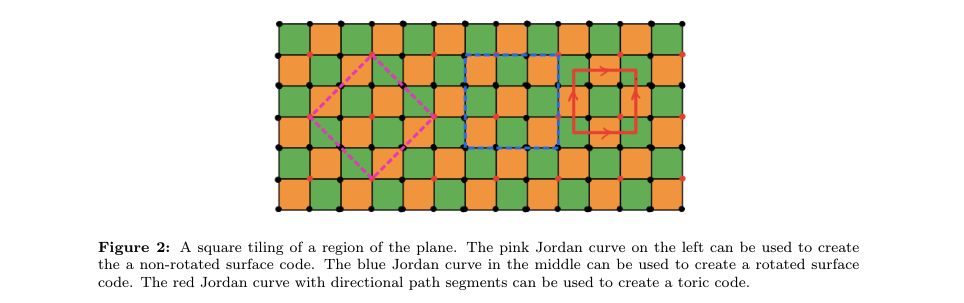


TileFactories use a simplified approach where by the region on the surface is tiled using a choosen tile relative to a lattice on that region. For example the second tiling above used the four square tile bedlow with the regulat lattive $\mathbb{Z}^2$:

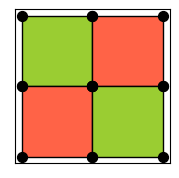

In [48]:
from qiskit_qec.geometry.tiles.checkerboardtile import CheckerBoardTile

CheckerBoardTile.draw()

A tile is a small collection of gauge operators layed out in a planar region that can be used to tile a region. The Tile contains data on the operators as well as geometric data.

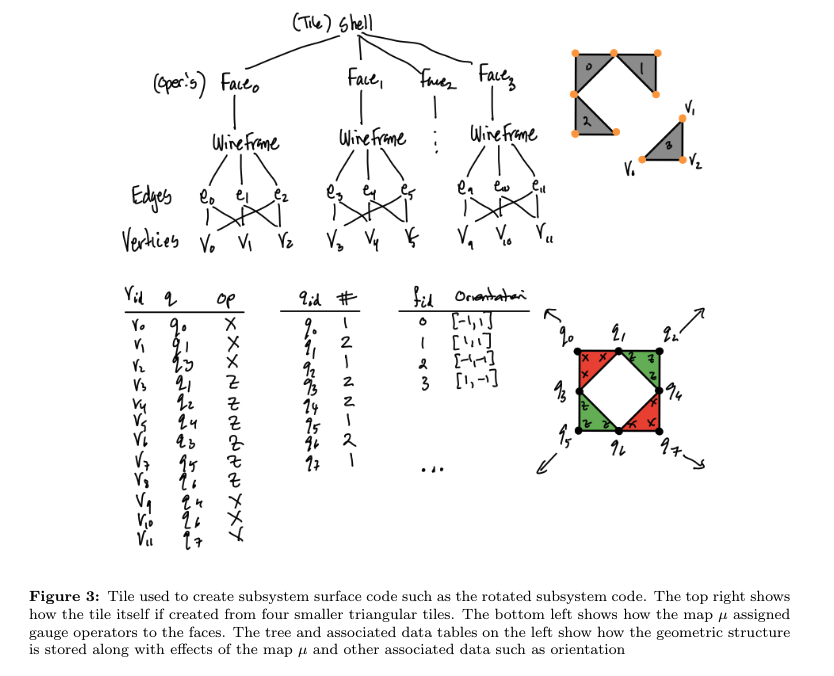

<div class="alert alert-block alert-warning">
    <b>Update:</b>  The current structure for storing these geometries has been updated slightly to allow for collections of operators to create one larger single operator.
</div>

The QEC Framework has some primitive geometric classes used to store geometric structures. At present these structures only consist of vertices, edges, wireframes, faces and shells. 

- A `Vertex` is a point in space
- An `Edge` is a list of `Vertex`s (so hyperedges are allowed and so are self loops).
- A `Wireframe` is a list of `Edge`s
- A `Face` is a list of `Wireframe`s
- A `Shell` is a list of `Faces`

Vertices may have qubits associated with them. Currently this is not possible with edges etc. but this will be added in the future. An operator (Pauli operator) is associated with the `Face` and a set of Pauli operators is assocoiated with a `Shell`.

The geometry system currently being used is a intermediate step until a solid geometry C++ library is created and implemented. Thus the current geometry work is not necessarily fast or fully featured.

In [49]:
from qiskit_qec.operators.pauli import Pauli

from qiskit_qec.geometry.model.qubit_count import QubitCount
from qiskit_qec.geometry.model.qubit_data import QubitData
from qiskit_qec.geometry.model.vertex import Vertex
from qiskit_qec.geometry.model.edge import Edge
from qiskit_qec.geometry.model.wireframe import WireFrame
from qiskit_qec.geometry.model.face import Face
from qiskit_qec.geometry.model.shell import Shell

In [58]:
# Create a square faces that represent an XXXX operator and a ZZZZ operator that
# share a common edge.

X_OPERATOR = Pauli("X")
Z_OPERATOR = Pauli("Z")
Y_OPERATOR = Pauli("Y")

qubit_count = QubitCount()
qubit_data = QubitData()

v1 = Vertex(np.array([0, 1]))
qubit_data.qubit[v1.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v1.id])
qubit_data.operator[v1.id] = X_OPERATOR

v2 = Vertex(np.array([1, 0]))
qubit_data.qubit[v2.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v2.id])
qubit_data.operator[v2.id] = X_OPERATOR

v3 = Vertex(np.array([1, 1]))
qubit_data.qubit[v3.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v3.id])
qubit_data.operator[v3.id] = X_OPERATOR

v4 = Vertex(np.array([0, 0]))
qubit_data.qubit[v4.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v4.id])
qubit_data.operator[v4.id] = X_OPERATOR

In [59]:
e1 = Edge([v4, v2])
e2 = Edge([v2, v3])
e3 = Edge([v3, v1])
e4 = Edge([v1, v4])

wf1 = WireFrame([e1, e2, e3, e4])
f1 = Face([wf1])

In [49]:
v5 = Vertex(np.array([1, 0]))
qubit_data.qubit[v5.id] = qubit_data.qubit[v1.id]
qubit_count.increment_qubit(qubit_data.qubit[v1.id])
qubit_data.operator[v5.id] = Z_OPERATOR

v6 = Vertex(np.array([1, 1]))
qubit_data.qubit[v6.id] = qubit_data.qubit[v3.id]
qubit_count.increment_qubit(qubit_data.qubit[v3.id])
qubit_data.operator[v6.id] = Z_OPERATOR

v7 = Vertex(np.array([2, 0]))
qubit_data.qubit[v7.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v7.id])
qubit_data.operator[v7.id] = Z_OPERATOR

v8 = Vertex(np.array([2, 1]))
qubit_data.qubit[v8.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v8.id])
qubit_data.operator[v8.id] = Z_OPERATOR


e5 = Edge([v5, v6])
e6 = Edge([v6, v8])
e7 = Edge([v8, v7])
e8 = Edge([v7, v5])

wf2 = WireFrame([e5, e5, e6, e7])
f2 = Face([wf2])

s = Shell([f1, f2])

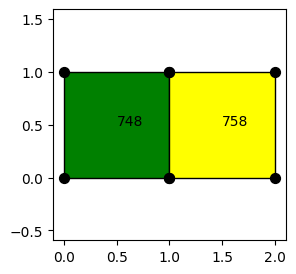

In [57]:
# Draw the shell
s.draw(
    qubit_data=qubit_data,
    xcolor="green",
    zcolor="yellow",
    show_face_ids=True,
    show_qubits=True,
    show_axis=True,
    figsize=(3, 3),
)

## Tiles

The current set of tiles are


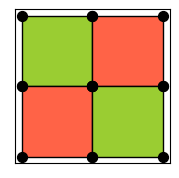

In [30]:
from qiskit_qec.geometry.tiles.checkerboardtile import CheckerBoardTile

CheckerBoardTile.draw()

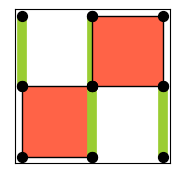

In [31]:
from qiskit_qec.geometry.tiles.diagonalbartile import DiagonalBarTile

DiagonalBarTile.draw()

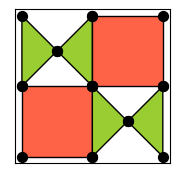

In [32]:
from qiskit_qec.geometry.tiles.diagonalhourglasstile import DiagonalHourGlassTile

DiagonalHourGlassTile.draw()

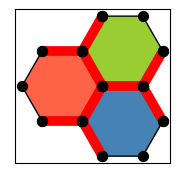

In [33]:
from qiskit_qec.geometry.tiles.hexagontile import HexagonTile

HexagonTile.draw()

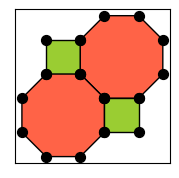

In [34]:
from qiskit_qec.geometry.tiles.octasquaretile import OctaSquareTile

OctaSquareTile.draw()

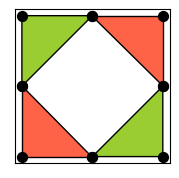

In [35]:
from qiskit_qec.geometry.tiles.squarediamondtile import SquareDiamondTile

SquareDiamondTile.draw()

## A Tile in Detail

```
    """Hexagon Tile


    Weight 6 operators (0,1,2)

                          q0      q1
                          v0      v1
                           o-----o
                      q3  /       \  q4
                      v5 o    0    o v2
        q2      q3        \       /
        v0      v1      q6 o-----o q7
         o-----o        v4         v3
    q5  /       \  q6  .(0,0)
    v5 o    1    o v2    q6       q7
        \       /        v0       v1
         o-----o           o-----o
        v4      v3    q9  /       \ q10
        q8      q9    v5 o    2    o v2
                          \       /
                           o-----o
                         v4       v3
                        q11       q12


                      o-----o
                     /       \
              o-----o    0    o
             /       \       /
            o    1    o-----o
             \       /       \
              o-----o    2    o
                     \       /
                      o-----o

    Weight 2 operators (3,4,5,6,7,8,9,10,11)

                        q0
                      o v1
                   3 /
                    o v0
                      q3

     q2   4     q3    q3        q4
     v1 o-----o v0  o v1      o v1
                     \ 5     / 6
                      o v0  o v0
                        q6    q7

                   v0 o-----o v1
                   q6    7    q7

                        q6    q7
                      o v0  o v0
     q8    10    q9  / 8     \ 9
     v1 o-----o v0  o         o v1
                      q9        q10
                    o v0
                     \ 11
                      o v1
                        q11

                      o
                    3/
              o--4--o         o
                     \5      /6
                      o--7--o
                     /8      \9
              o--10-o         o
                     \11
                      o


    """
```

The Tile class has a set of specific variables that describe the tile detailes:

***

`wf_operator_dict:` Predefined settings for how operators are assigned to wireframes

```
wf_operator_dict = {
        "cX": [
            PauliList(["XXXXXX"], input_qubit_order="left-to-right"),  # 0
            PauliList(["XXXXXX"], input_qubit_order="left-to-right"),  # 1
            PauliList(["XXXXXX"], input_qubit_order="left-to-right"),  # 2
            None,  # 3
            None,  # 4
            None,  # 5
            None,  # 6
            None,  # 7
            None,  # 8
            None,  # 9
            None,  # 10
            None,  # 11
        ]]
```
***

`wf_q_indices:` Descriptions of wireframes - qubit indices for each wireframe

```
wf_q_indices = [
        [0, 1, 4, 7, 6, 3],  # 0
        [2, 3, 6, 9, 8, 5],  # 1
        [6, 7, 10, 12, 11, 9],  # 2
        [3, 0],  # 3
        [3, 2],  # 4
        [6, 3],  # 5
        [7, 4],  # 6
        [6, 7],  # 7
        [6, 9],  # 8
        [7, 10],  # 9
        [9, 8],  # 10
        [9, 11], # 11
    ]  
```

***

`wf_coordinates:` Coordinates for each wireframe vertex in path list form to enable the creation of the associate edges

```
    wf_coordinates = [
        [[0, 2 * r], [2 * h, 2 * r], [1 + h, r], [1, 0], [0, 0], [-h, r]],  # 0
        [[-1 - h, r], [-h, r], [0, 0], [-h, -r], [-1 - h, -r], [-2, 0]],  # 1
        [[0, 0], [1, 0], [1 + h, -r], [2 * h, -2 * r], [0, -2 * r], [-h, -r]],  # 2
        [[-h, r], [0, 2 * r]],  # 3
        [[-h, r], [-1 - h, r]],  # 4
        [[0, 0], [-h, r]],  # 5
        [[1, 0], [1 + h, r]],  # 6
        [[0, 0], [1, 0]],  # 7
        [[0, 0], [-h, -r]],  # 8
        [[1, 0], [1 + h, -r]],  # 9
        [[-h, -r], [-1 - h, -r]],  # 10
        [[-h, -r], [0, -2 * r]],  # 11
    ]
```

***

`wf_loop_indicator:` If the wf's are closed loops or not

```
    wf_loop_indicator = [
        True,
        True,
        True,
        False,
        False,
        False,
        False,
        False,
        False,
        False,
        False,
        False,
    ]
```

***


`faces_wf_components:` How wireframes components combine into faces/operators

```
    faces_wf_components = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]
```
***

`face_colors:` Face colors (wf's inherit colors from faces)

```
    face_colors = [
        "yellowgreen",
        "tomato",
        "steelblue",
        "red",
        "red",
        "red",
        "red",
        "red",
        "red",
        "red",
        "red",
        "red",
    ]
```

***

`num_faces:` Number of Faces

`size:` Size of AABB (Axis Aligned Bounding Box)

`num_qubits:` Number of qubits

`u_vec:` : Default lattice vector (u) to use with tile. Lattice defined by $\textrm{Span}_{\mathbb{Z}}(u,v)$

`v_vec:` : Default lattice vector (v) to use with tile. Lattice defined by $\textrm{Span}_{\mathbb{Z}}(u,v)$


## Tile Factory

A Tile Factory is like a car plant that can be configured to build a large section of different cars - different brands, models etc. If required more work to use and a lot more parameters to set.

We show one by example. Below is how to use the a TileFactory to build triangular color codes:


In [67]:
# Load a Tile to use
from qiskit_qec.geometry.tiles.hexagontile import HexagonTile

# Load the TileFactory Class
from qiskit_qec.codes.codefactory.tilecodefactory import TileCodeFactory

# Load the Shape class for the cutter
from qiskit_qec.geometry.shape import Shape

# Class for the surface
from qiskit_qec.geometry.plane import Plane

# Lattice class
from qiskit_qec.geometry.lattice import Lattice

In [68]:
# Choose parameter
d = 7

# Create cutter
scale = 3 * (d - 1) / 2
delta = 0.02
points = [
    [-delta, -delta],
    [scale * HexagonTile.h, scale * HexagonTile.r + delta],
    [scale + delta, -delta],
]
cutter = Shape(points=points)

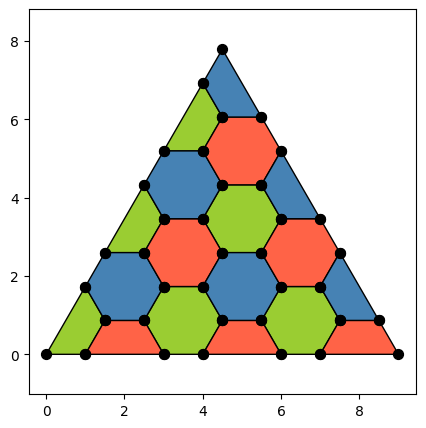

In [69]:
# Create a code factory
triangular_code_factory = TileCodeFactory()

show_working = False

## Set to display intermediate views to allow for correction configuration errors
show_face_colors = show_working  # As each face as two operators (X and Z) use face colors
show_inside = show_working  # Show which qubits are inside the cutter
lattice_view = show_working  # Show the lattice view
precut_tiling_view = show_working  # Show the tiling before cutting


# Configure the code factory
triangular_code_factory.set_parameters(
    manifold=Plane(),
    tile=HexagonTile,
    lattice=Lattice(u_vec=HexagonTile.u_vec, v_vec=HexagonTile.v_vec),
    cutter=cutter,
    on_boundary=False,
    boundary_strategy="combine",
    levels=[4, 6],
    tile_optype="dXZ",
    show_face_colors=show_face_colors,
    show_inside=show_inside,
    lattice_view=lattice_view,
    precut_tiling_view=precut_tiling_view,
)

# Update the factory is_configure check. This is used since we
# directly updated the TileCodeFactory configuration instead of
# using the individual TileCodeFactory configuration methods.
triangular_code_factory.update_is_configure()

# Create the triangular color code
code = triangular_code_factory.make_code()

# As multiple operators occupy a single face use Face coloring
code.draw(face_colors=True, figsize=(5, 5))

In [39]:
code.generators

PauliList(['X0X1X2X3', 'Z0Z1Z2Z3', 'X4X5X6X7X8X9', 'Z4Z5Z6Z7Z8Z9',
           'X1X3X6X8', 'Z1Z3Z6Z8', 'X10X11X12X13X14X15',
           'Z10Z11Z12Z13Z14Z15', 'X7X9X12X14', 'Z7Z9Z12Z14',
           'X13X15X16X17', 'Z13Z15Z16Z17', 'X18X19X20X21',
           'Z18Z19Z20Z21', 'X0X1X4X6X20X21', 'Z0Z1Z4Z6Z20Z21',
           'X22X23X24X25X26X27', 'Z22Z23Z24Z25Z26Z27',
           'X4X5X19X21X24X26', 'Z4Z5Z19Z21Z24Z26', 'X5X7X10X12X26X27',
           'Z5Z7Z10Z12Z26Z27', 'X10X11X25X27X28X29',
           'Z10Z11Z25Z27Z28Z29', 'X11X13X16X29', 'Z11Z13Z16Z29',
           'X30X31X32X33', 'Z30Z31Z32Z33', 'X18X19X22X24X32X33',
           'Z18Z19Z22Z24Z32Z33', 'X22X23X31X33X34X35',
           'Z22Z23Z31Z33Z34Z35', 'X23X25X28X35', 'Z23Z25Z28Z35',
           'X30X31X34X36', 'Z30Z31Z34Z36'])

In [70]:
code.shell.faces[1].vertices

[[4. 0.],
 [4.5       0.8660254],
 [4.         1.73205081],
 [3.         1.73205081],
 [2.5       0.8660254],
 [3. 0.]]

## Code Builders

A configured TileFactory can be bundled into a CodeBuilder class for easy use:

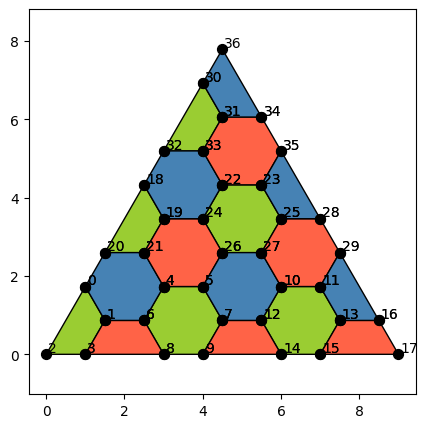

In [71]:
from qiskit_qec.codes.codebuilders.triangular_color_code_builder import TriangularColorCodeBuilder

code = TriangularColorCodeBuilder(d=7).build()
code.draw(face_colors=True, show_index=True, figsize=(5, 5))

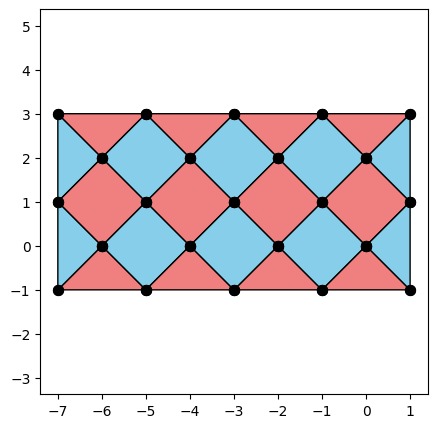

In [42]:
from qiskit_qec.codes.codebuilders.surface_code_builder import SurfaceCodeBuilder

code = SurfaceCodeBuilder(dx=3, dz=5).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue", figsize=(5, 5))

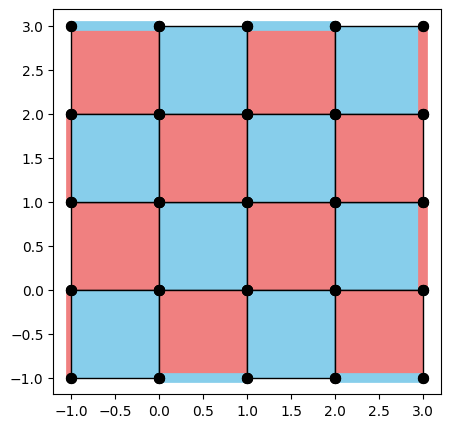

In [43]:
from qiskit_qec.operators.pauli import Pauli
from qiskit_qec.codes.codebuilders.rotated_surface_code_builer import RotatedSurfaceCodeBuilder

code = RotatedSurfaceCodeBuilder(d=5, ul_op=Pauli("X")).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue", figsize=(5, 5))

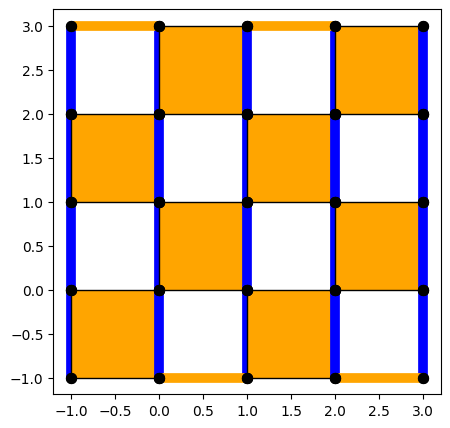

In [44]:
from qiskit_qec.codes.codebuilders.heavyhex_code_builder import HeavyHexCodeBuilder

code = HeavyHexCodeBuilder(d=5).build()
code.draw(face_colors=False, xcolor="orange", zcolor="blue", figsize=(5, 5))

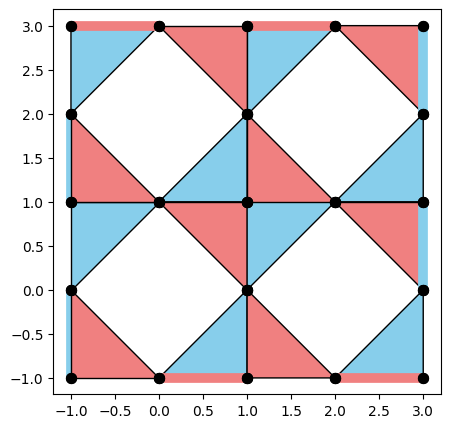

In [45]:
from qiskit_qec.codes.codebuilders.subsystem_surface_code_builder import SubsystemSurfaceCodeBuilder

code = SubsystemSurfaceCodeBuilder(d=5).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue", figsize=(5, 5))

## Now for something more challenging

Let's build a $YZX^2$ Hexagonal stabilizer code by Basudha Srivastava, Anton Frisk Kockum, and Mats Granath [https://doi.org/10.22331/q-2022-04-27-698]

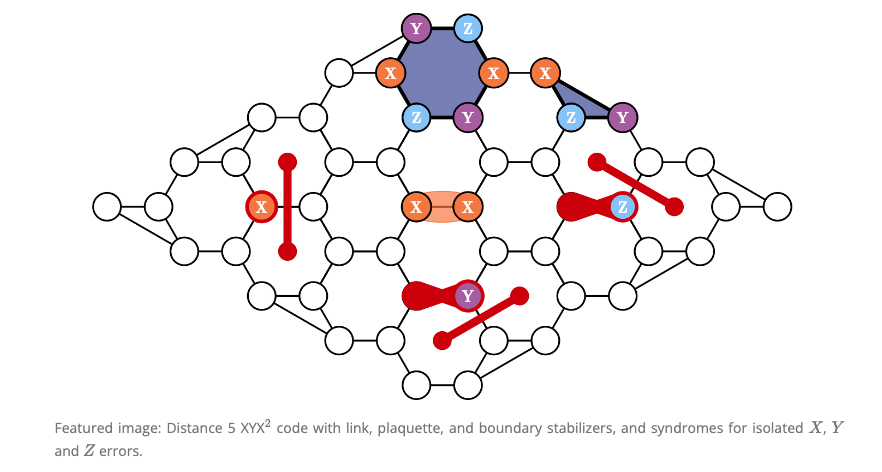

The more difficult aspect of building this code is the boundary. First we set load up the needed classes.

In [46]:
from qiskit import QiskitError
from qiskit_qec.codes.codebuilders.builder import Builder
from qiskit_qec.codes.codefactory.tilecodefactory import TileCodeFactory
from qiskit_qec.codes.stabsubsystemcodes import StabSubSystemCode

# Load the appropriate tile: Hexagon Tile
from qiskit_qec.geometry.tiles.hexagontile import HexagonTile

# Load the Shape class to create a cutter
from qiskit_qec.geometry.shape import Shape

# Load the manifold to be tiled
from qiskit_qec.geometry.plane import Plane

# Load the lattice class to tile against
from qiskit_qec.geometry.lattice import Lattice

from qiskit_qec.geometry.model.qubit_data import QubitData

In [47]:
d = 5
# Set the d parameter
if not bool(d % 2) or d < 3:
    print(f"Distance d={d} must be an odd positive integer ≥ 3")

# Define the set of points defining the diamond
scale = d - 1

h = HexagonTile.h
r = HexagonTile.r
points = [
    [h, -r / 3],
    [2 * h + scale * 3 * h, scale * r],
    [h, r / 3 + 2 * r * scale],
    [scale * (-3 * h), scale * r],
]
# Create the diamond cutter
cutter = Shape(points=points)

We now build an **exclude** method that will decide on what to do with the boundary operators.

In [48]:
# Exclude method used to select the required boundary
# pylint: disable=unused-variable, unused-argument
def exclude(vertex_paths, qubit_data: QubitData) -> bool:
    """exclude method for Shell class to use for building boundary operators"""

    def _weight_len(path) -> int:
        # Find the weight of the operator from the vertex path listing
        length = len(path)
        if path[0] == path[-1] and length > 1:
            return length - 1
        return length

    weights = [_weight_len(path) for path in vertex_paths]
    weight = sum(weights)

    # Create the equations for the lines bounding the diamond
    # Stored as [A,B,C] for equation Ax+By+C=0
    lines = [0] * 4
    for i in range(4):
        m_grad = (points[(i + 1) % 4][1] - points[i][1]) / (points[(i + 1) % 4][0] - points[i][0])
        lines[i] = [1, -m_grad, m_grad * points[i][0] - points[i][1]]

    def near_line(line, point, epsilon=0.01):
        # Return |Ax+By+C| < epsilon
        return abs(line[0] * point[1] + line[1] * point[0] + line[2]) < epsilon

    def find_indicator(lines_, point):
        return [near_line(line, point) for line in lines_]

    # Ignore any operator that is not of weight 3
    if weight != 3:
        return False
    else:
        triangle_pos = [vertex.pos for vertex in vertex_paths[0]]
        triangle_pos = triangle_pos[:-1]
        indicators = [find_indicator(lines, point) for point in triangle_pos]
        # Find which line the triangle belongs to (if any)
        ind = [i + j + k for i, j, k in zip(*indicators)]
        # Remove the all zero case (not on any lines)
        if sum(ind) == 0:
            return False
        # Remove the single zero indicator
        if sum(indicators[0]) == 0:
            on_line_indices = [1, 2]
        elif sum(indicators[1]) == 0:
            on_line_indices = [0, 2]
        else:
            on_line_indices = [0, 1]
        # Find which line the triangle is on
        line_indicator = [
            u & v for u, v in zip(indicators[on_line_indices[0]], indicators[on_line_indices[1]])
        ]
        line_index = [index for index, val in enumerate(line_indicator) if bool(val) is True][0]
        a_y = min(triangle_pos[on_line_indices[0]][1], triangle_pos[on_line_indices[1]][1])
        # TODO: Replace this with a single calculation to avoid branches
        if line_index == 0:
            k = (a_y) / (2 * r)
        elif line_index == 1:
            k = (a_y - scale * r) / (2 * r)
        elif line_index == 2:
            k = ((a_y - scale * r) / r - 1) / 2
        elif line_index == 3:
            k = ((a_y / r) - 1) / 2
        if abs(k - round(k)) < 0.01:
            return False
        return True

In [49]:
# Create a code factory
yzx2_code_factory = TileCodeFactory()

In [50]:
# Configure the code factory
yzx2_code_factory.set_parameters(
    manifold=Plane(),
    tile=HexagonTile,
    lattice=Lattice(u_vec=HexagonTile.u_vec, v_vec=HexagonTile.v_vec),
    cutter=cutter,
    on_boundary=True,
    boundary_strategy="combine",
    inside_levels=[2, 6],
    boundary_levels=[3],
    tile_optype="cYZX2-hXX",
    exclude=exclude,
    lattice_view=False,
    precut_tiling_view=False,
    rotate=0,
)

In [51]:
# Update the factory is_configure check. This is used since we
# directly updated the TileCodeFactory configuration instead of
# using the individual TileCodeFactory configuration methods.
yzx2_code_factory.update_is_configure()

In [52]:
yxz2_code = yzx2_code_factory.make_code()

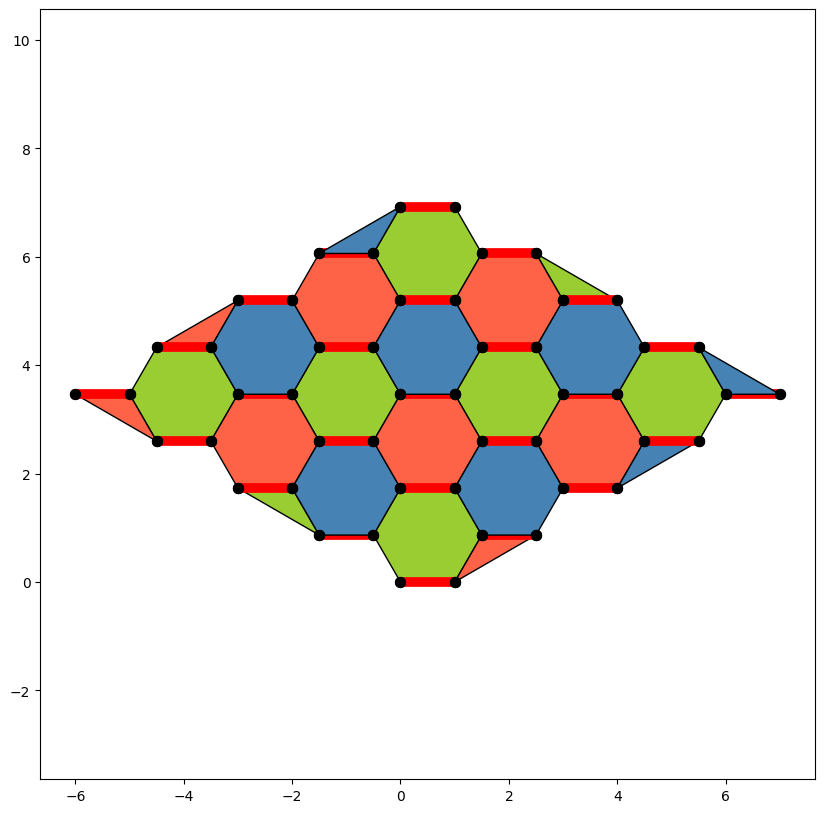

In [53]:
yxz2_code.draw(face_colors=True)

## Simulating fault-tolerant error-correction circuits

**Note** There is not enough time to discuss this topic so we only introduce it here but provide references. The details of this run through will be released with the QEC summer school.

Here we step through the process of constructing and simulating quantum error-correction using the heavy-hexagon compass code family.

You can find more information in the following references, but the results we illustrate in this notebook are not identical to those in the references.

References:

* https://journals.aps.org/prx/abstract/10.1103/PhysRevX.10.011022 (Chamberland, Zhu, Yoder, Hertzberg, AWC)
* https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.128.110504 (Chen, Yoder, Kim, Sundaresan, Srinivasan, Li, Córcoles, AWC, Takita)
* https://arxiv.org/abs/2203.07205 (Sundaresan, Yoder, Kim, Li, Chen, Harper, Thorbeck, AWC, Córcoles, Takita)


The specific detailed notebooks associated with this work - those that where given at the 2022 QEC Summer School can be found here: https://github.com/awcross1/qec-summer-school


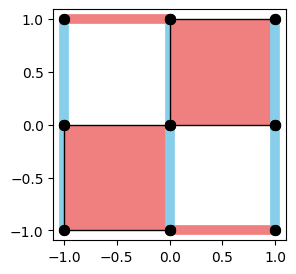

In [54]:
from qiskit_qec.codes.codebuilders.heavyhex_code_builder import HeavyHexCodeBuilder

code = HeavyHexCodeBuilder(d=3).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue", figsize=(3, 3))

The stabilizer group is
\begin{align}
\nonumber \mathcal{S}=\langle  \overbrace{X_{i,j}X_{i,j+1}X_{i+1,j}X_{i+1,j+1}}^{\text{$i+j$ odd}}, 
X_{2m, d}X_{2m+1, d}, 
X_{2m-1, 1}X_{2m, 1}, \ \prod_i Z_{i,j}Z_{i,j+1}  \rangle.
\end{align}

Here, $X_{i,j}X_{i,j+1}X_{i+1,j}X_{i+1,j+1}$ is a weight-four surface code stabilizer in the bulk, which can be measured via taking the product of the measured eigenvalues of the two weight-two gauge generators $X_{i,j}X_{i+1,j}$ and $X_{i,j+1}X_{i+1,j+1}$. This factorization significantly reduces circuit depth for the $X$ syndromes.

## Decoders


One of the goals of the Qiskit-QEC software framework is to provide more stuctured modularity for building and using decoders. Decoders in the framework generally fit into one of three/four categories

- **Specialized:** Decoders that are are not modular and are very specific to a code, application, quantum computer, ... but fast
- **External:** Decoders that are developed and maintained outside the framework
- **Modular (Pedagogical)** - Decoders used for teaching and experimentation with limited scope/realization
- **Modular (Research)** - Decoders and modules used for general research, experimentation, etc.

We are currently researching how best to build good modules for modular decoders but some of the ideas have been put into the Pedagogical decoder work that is being developed. We will examine that aspect here.

<div class="alert alert-block alert-info">
    <b>Note:</b> For simplicity we will only consider memory experiments.
</div>

Let $\mathcal{E}$ be a completely positive trace preserving (CPTP) linear map $\mathcal{E}:D(\mathcal{H})\rightarrow D(\mathcal{H})$ that is correctable with respect to the subsystem code $\mathcal{H} = (A\otimes{B})\oplus{C}$. Then a set up for a simple quantum memory experiment would be as follows:

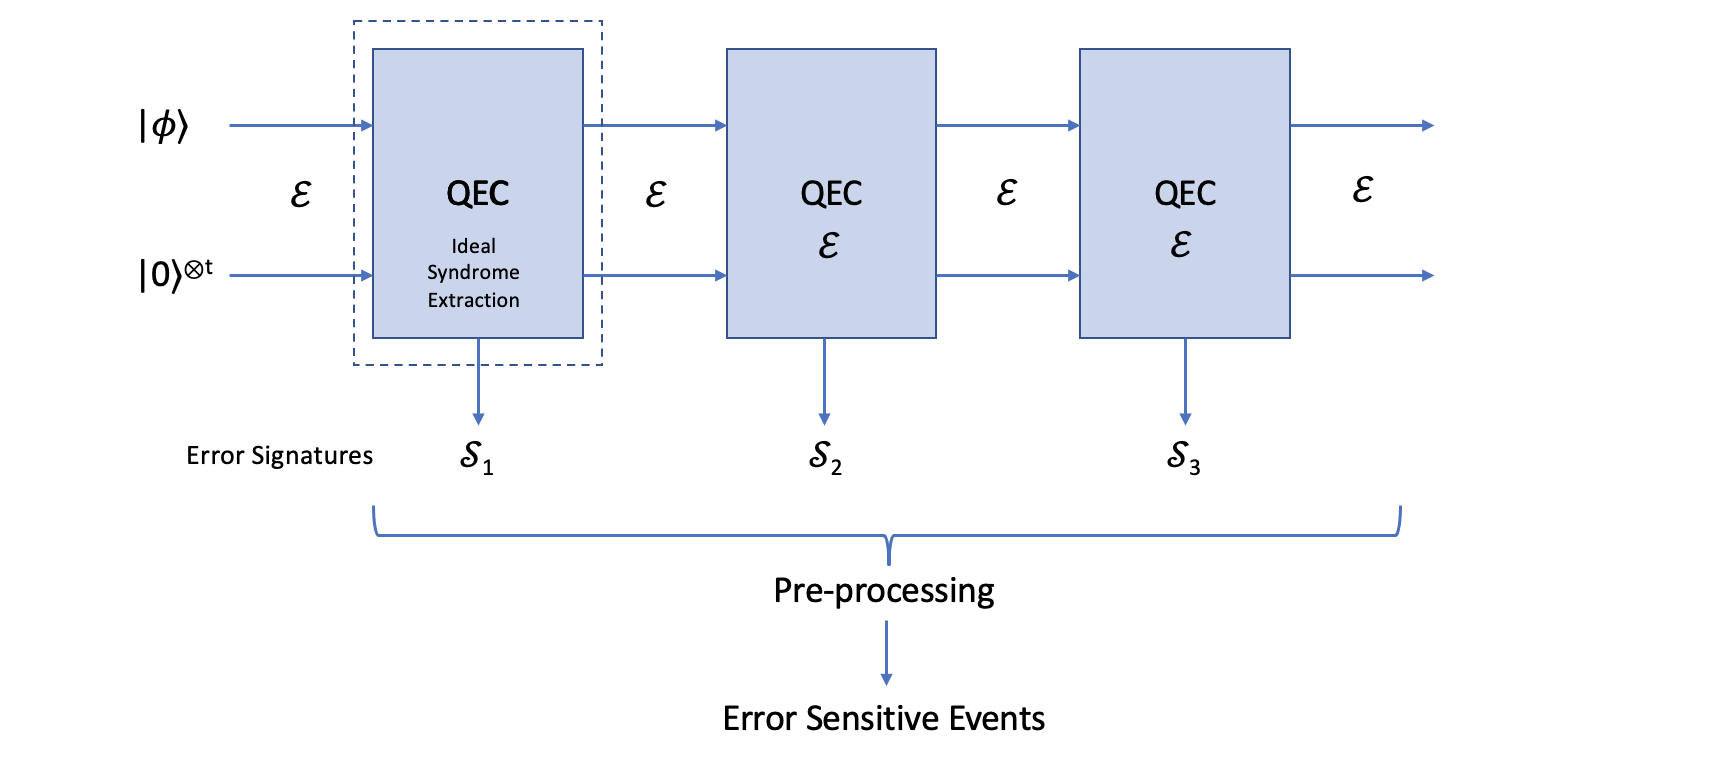

Here the signatures are eigenvalues for each of the stabilizer/gauge/check/flag/etc operators measured. For QEC experiments the eigenvalues are usually translated into 0s or 1s with a 0 indicating the the +1 eigenstate - i.e. no error detected and a 1 indicating the detection of an error. Ideal syndrome extraction in which no errors occur during the QEC cycle. The more general case is when errors can occur during the QEC cycle. 


The error sensitive events become the nodes and and Pauli errors become the edges in a error hypergraph. Events are the changes of subsequent measurements of the same stabilizer and flag qubits measurements (if they are being used).

**Repetition Code Example**

The following is an example of a repetition code that outputs $T$ signatures each consisting of $d$ stabilizers being measured.

In [1]:
import qiskit

In [2]:
from qiskit_qec.circuits import RepetitionCodeCircuit

d = 3
T = 2

code = RepetitionCodeCircuit(d, T, resets=True, xbasis=False, barriers=True)

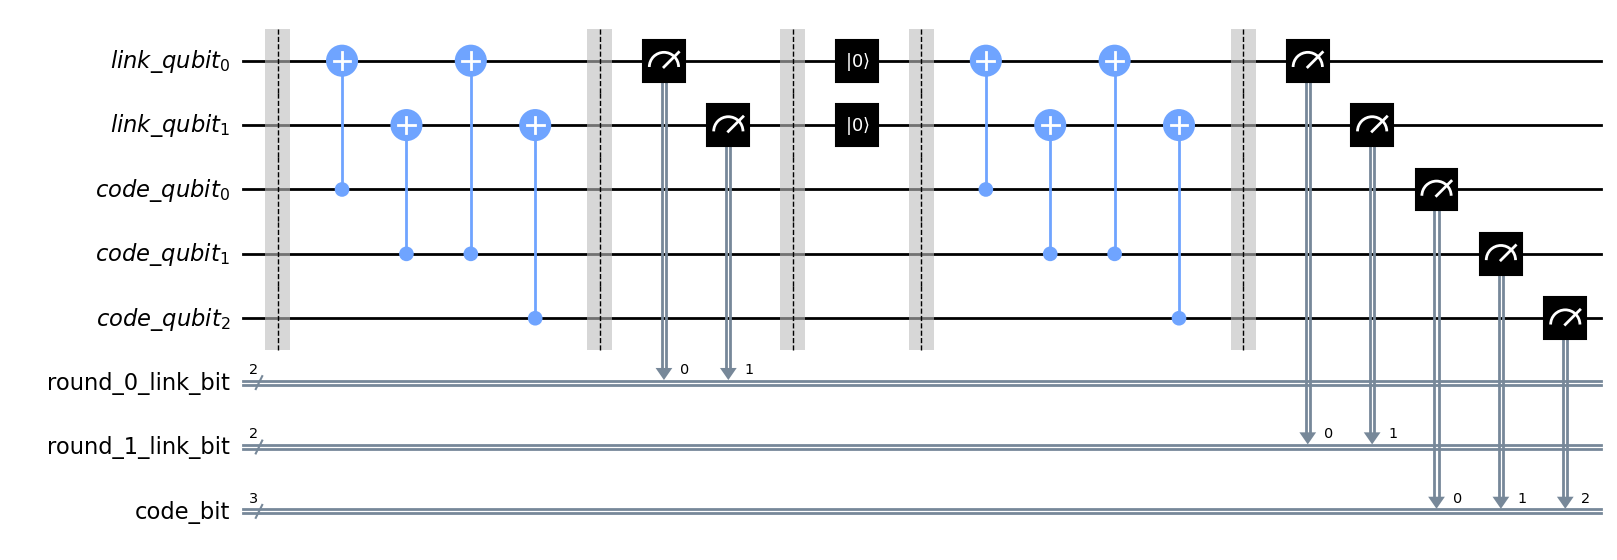

In [3]:
code.circuit["0"].draw(output="mpl")

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

examples_qasm = [
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\nx code_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nx link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nx link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
    'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[2];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n',
]

examples = []
for qasm in examples_qasm:
    examples.append(QuantumCircuit.from_qasm_str(qasm))

In [5]:
example_explanations = {
    0: "Initialization error on `code_qubit[0]`",
    1: "Error on `code_qubit[0]` while idle during first round of measurements.",
    2: "Error on `code_qubit[0]` while idle during second round of measurements.",
    3: "Initialization error on `code_qubit[1]`",
    4: "Error on `code_qubit[1]` while idle during first round of measurements.",
    5: "Error on `code_qubit[1]` while idle during second round of measurements.",
    6: "Error on `code_qubit[1]` between `cx` gates of first syndrome measurement.",
    7: "Measurement error on `link_qubit[1]` during first round of measurements.",
    8: "Measurement error on `link_qubit[1]` during second round of measurements. ",
    9: "Initialization error on `code_qubit[2]`",
}

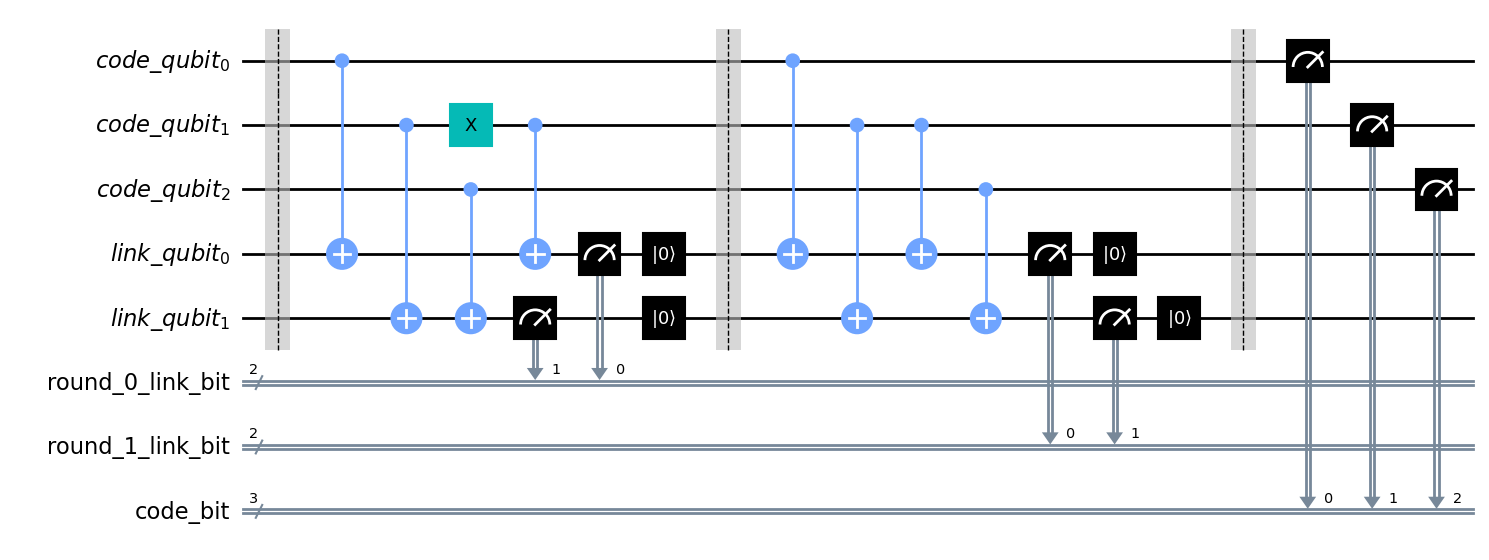

In [6]:
example = examples[6]
example.draw(output="mpl")

Unfortunately there are now some issues with the decoding part of the tutorial that have appeared since the summer school in July and so that code cannot be demonstrated here directly. Instead you can following the full 6 hour course by James at the following address: https://github.com/quantumjim/qec_lectures

In Jan/Feb of 2023 the videos of these lectures will be released along with the entire summer school content.